In [6]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

with open('dmv_census_tract_analysis.json') as f:
    raw_data = json.load(f)

# Extract all tracts from all categories
all_tracts = []

# Loop through each wait time category
for category, tracts in raw_data['tracts_by_category'].items():
    for tract in tracts:
        # Add the category name to each tract record
        tract['wait_time_category'] = category
        all_tracts.append(tract)


df = pd.DataFrame(all_tracts)

print(f"DataFrame created with {len(df)} rows and {len(df.columns)} columns")
print("\nColumns:", list(df.columns))
print("\nFirst few rows:")
df.head()

DataFrame created with 9129 rows and 11 columns

Columns: ['tract_id', 'tract_name', 'county_fips', 'wait_time_minutes', 'wait_time_category', 'nearest_dmv_office', 'nearest_dmv_address', 'distance_to_dmv_degrees', 'dmv_appointment_wait', 'dmv_walkin_wait', 'color_hex']

First few rows:


,tract_id,tract_name,county_fips,wait_time_minutes,wait_time_category,nearest_dmv_office,nearest_dmv_address,distance_to_dmv_degrees,dmv_appointment_wait,dmv_walkin_wait,color_hex
0,06001442700,4427,001,0,No Wait (0 min),Fremont,"4287 Central Avenue, Fremont, CA 94536",0.016212,0,0,#00ff00
1,06001442800,4428,001,0,No Wait (0 min),Fremont,"4287 Central Avenue, Fremont, CA 94536",0.027811,0,0,#00ff00
2,06037104321,1043.21,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.009444,0,0,#00ff00
3,06037104322,1043.22,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.007139,0,0,#00ff00
4,06037320101,3201.01,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.022503,0,0,#00ff00


In [3]:
# Set tract_id as the index and rename it to geo_id
df_indexed = df.set_index('tract_id')
df_indexed.index.name = 'GEO_ID'

# Check the result
df_indexed.tail()

,tract_name,county_fips,wait_time_minutes,wait_time_category,nearest_dmv_office,nearest_dmv_address,distance_to_dmv_degrees,dmv_appointment_wait,dmv_walkin_wait,color_hex
GEO_ID,,,,,,,,,,
06111005909,59.09,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.065360,13,43,#b6ff00
06111006000,60,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.102860,13,43,#b6ff00
06111005305,53.05,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.103171,13,43,#b6ff00
06111005910,59.10,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.093564,13,43,#b6ff00
06111002901,29.01,111,43,Moderate (31-45 min),Ventura,"4260 Market Street, Ventura, CA 93003",0.041956,17,43,#b6ff00


In [4]:
import re

# Method 1: Extract zip code using regex (most reliable)
def extract_zip_code(address):
    if pd.isna(address):
        return None
    # Look for 5-digit zip code pattern
    zip_match = re.search(r'\b\d{5}\b', str(address))
    return zip_match.group() if zip_match else None

# Create new column with DMV zip codes
df_indexed['dmv_zip_code'] = df_indexed['nearest_dmv_address'].apply(extract_zip_code)

# Check the result
df_indexed

,tract_name,county_fips,wait_time_minutes,wait_time_category,nearest_dmv_office,nearest_dmv_address,distance_to_dmv_degrees,dmv_appointment_wait,dmv_walkin_wait,color_hex,dmv_zip_code
GEO_ID,,,,,,,,,,,
06001442700,4427,001,0,No Wait (0 min),Fremont,"4287 Central Avenue, Fremont, CA 94536",0.016212,0,0,#00ff00,94536
06001442800,4428,001,0,No Wait (0 min),Fremont,"4287 Central Avenue, Fremont, CA 94536",0.027811,0,0,#00ff00,94536
06037104321,1043.21,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.009444,0,0,#00ff00,11623
06037104322,1043.22,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.007139,0,0,#00ff00,11623
06037320101,3201.01,037,0,No Wait (0 min),Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",0.022503,0,0,#00ff00,11623
...,...,...,...,...,...,...,...,...,...,...,...
06111005909,59.09,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.065360,13,43,#b6ff00,91362
06111006000,60,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.102860,13,43,#b6ff00,91362
06111005305,53.05,111,43,Moderate (31-45 min),Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",0.103171,13,43,#b6ff00,91362


In [5]:
import re
def extract_zip_code_fixed(address):
    """
    Extract zip code from DMV address string
    """
    if pd.isna(address):
        return None

    address_str = str(address)

    # Look for 5-digit zip code pattern
    zip_patterns = [
        r'CA\s+(\d{5})',           # "CA 94536"
        r',\s*CA\s+(\d{5})',       # ", CA 94536"
        r',\s*(\d{5})(?:\s|$)',    # ", 94536"
        r'\b(\d{5})(?:\s|$)'       # Any 5 digits at word boundary
    ]

    for pattern in zip_patterns:
        match = re.search(pattern, address_str)
        if match:
            return int(match.group(1))  # Convert to integer

    return None

# Apply the fixed function
df_indexed['dmv_zip_code'] = df_indexed['nearest_dmv_address'].apply(extract_zip_code_fixed)

# Check the results
print("Zip code extraction results:")
zip_check = df_indexed[['nearest_dmv_office', 'nearest_dmv_address', 'dmv_zip_code']].drop_duplicates()
print(zip_check)
# Step 1: Make sure data is clean
print("Step 1: Data cleanup")
print(f"DataFrame shape: {df_indexed.shape}")
print(f"Columns: {df_indexed.columns.tolist()}")

# Step 2: Extract zip codes properly
df_indexed['dmv_zip_code'] = df_indexed['nearest_dmv_address'].apply(extract_zip_code_fixed)

# Step 3: Check for any missing values in key columns
print("\nStep 3: Missing values check")
print(f"Missing nearest_dmv_office: {df_indexed['nearest_dmv_office'].isna().sum()}")
print(f"Missing dmv_zip_code: {df_indexed['dmv_zip_code'].isna().sum()}")

# Step 4: Group by DMV office (the operation that was failing)
print("\nStep 4: Grouping by DMV office")
try:
    dfgrouped = df_indexed.groupby('nearest_dmv_office').size().reset_index(name='num_census_tracts')
    print("Grouping successful!")
    print(dfgrouped)
except Exception as e:
    print(f"Grouping failed: {e}")
    print("Available columns:", df_indexed.columns.tolist())

# Step 5: Show unique DMV offices and their zip codes
print("\nStep 5: Unique DMV offices with zip codes")
unique_dmvs = df_indexed[['nearest_dmv_office', 'nearest_dmv_address', 'dmv_zip_code']].drop_duplicates()
unique_dmvs

Zip code extraction results:
                                            nearest_dmv_office  \
GEO_ID                                                           
06001442700                                            Fremont   
06037104321  Pacoima Driver License Processing Center (DL O...   
06095253502                                          Pittsburg   
06001450200                                         Pleasanton   
06105000500                                        Weaverville   
...                                                        ...   
06029005207                                         Ridgecrest   
06037800406                                      Thousand Oaks   
06031001601                                             Tulare   
06111003011                                            Ventura   
06107004200                                             Delano   

                                           nearest_dmv_address  dmv_zip_code  
GEO_ID                           

,nearest_dmv_office,nearest_dmv_address,dmv_zip_code
GEO_ID,,,
06001442700,Fremont,"4287 Central Avenue, Fremont, CA 94536",94536
06037104321,Pacoima Driver License Processing Center (DL O...,"11623 Glenoaks Blvd, Pacoima, CA 91331",91331
06095253502,Pittsburg,"1399 Buchanan Road, Pittsburg, CA 94565",94565
06001450200,Pleasanton,"6300 W Las Positas Blvd, Pleasanton, CA 94588",94588
06105000500,Weaverville,"1511 Main Street, Weaverville, CA 96093",96093
...,...,...,...
06029005207,Ridgecrest,"540A Perdew Avenue, Ridgecrest, CA 93555",93555
06037800406,Thousand Oaks,"1810 E. Avenida De Los Arboles, Thousand Oaks,...",91362
06031001601,Tulare,"274 E Cross Avenue, Tulare, CA 93274",93274


In [3]:
latlongdmvdf = pd.read_csv('dmv_offices_details.csv')
latlongdmvdf

,office_name,address,latitude,longitude,zip_code,zip_area_name,appointment_wait_minutes,walkin_wait_minutes,appointment_wait_str,walkin_wait_str,has_coordinates,processing_date
0,Alturas,"903 W C St, Alturas, CA 96101",41.491912,-120.549843,96101,Alturas,0,0,0,0,True,7/6/25 21:35
1,Arleta,"14400 Van Nuys Blvd, Arleta, CA 91331",34.247912,-118.445219,91331,Pacoima,23,79,23,79,True,7/6/25 21:35
2,Arvin,"317 Campus Dr., Arvin, CA 93203",35.211267,-118.833322,93203,Arvin,28,88,28,88,True,7/6/25 21:35
3,Auburn,"11722 Enterprise Dr, Auburn, CA 95603",38.906963,-121.082718,95603,Auburn,0,0,0,0,True,7/6/25 21:35
4,Bakersfield,"3120 F Street, Bakersfield, CA 93301",35.387808,-119.023347,93301,Bakersfield,27,80,27,80,True,7/6/25 21:35
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Willows,"815 N. Humboldt Avenue, Willows, CA 95988",39.529024,-122.211949,95988,Willows,0,0,0,0,True,7/6/25 21:35
163,Winnetka,"20725 Sherman Way, Winnetka, CA 91306",34.201248,-118.584703,91306,Winnetka,21,75,21,75,True,7/6/25 21:35
164,Woodland,"825 East St, Suite 306, CA 95776",38.662600,-121.764500,95776,Woodland,0,0,0,0,True,7/6/25 21:35
165,Yreka,"1848 Fort Jones Rd, Yreka, CA 96097",41.701709,-122.646070,96097,Yreka,0,0,0,0,True,7/6/25 21:35


In [10]:
latlongdmvdf['appointment_wait_str'].mean()

16.095808383233532

In [7]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [8]:

def visualize_neighbor_network(latlongdmvdf, neighbors_dict):
    """
    Visualize the k-nearest neighbor network
    """
    unique_dmvs = latlongdmvdf.drop_duplicates(subset=['latitude', 'longitude'])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Plot 1: All DMV locations
    ax1.scatter(unique_dmvs['longitude'], unique_dmvs['latitude'],
                c='red', s=50, alpha=0.7)
    ax1.set_title('All 176 DMV Locations')
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')

    # Plot 2: DMV locations with neighbor connections
    ax2.scatter(unique_dmvs['longitude'], unique_dmvs['latitude'],
                c='red', s=50, alpha=0.7)

    # Draw lines to neighbors for a few example DMVs
    example_dmvs = list(neighbors_dict.keys())[:5]  # Show first 5 DMVs

    for dmv_name in example_dmvs:
        # Find this DMV's coordinates
        dmv_row = unique_dmvs[unique_dmvs['zip_area_name'] == dmv_name]
        if len(dmv_row) > 0:
            dmv_lat, dmv_lng = dmv_row.iloc[0]['latitude'], dmv_row.iloc[0]['longitude']

            # Draw lines to its neighbors
            neighbors = neighbors_dict[dmv_name]
            for neighbor in neighbors:
                ax2.plot([dmv_lng, neighbor['longitude']],
                        [dmv_lat, neighbor['latitude']],
                        'b-', alpha=0.3, linewidth=0.5)

    ax2.set_title('DMV Neighbor Network (showing 5 DMVs)')
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')

    plt.tight_layout()
    plt.show()

def visualize_distance_matrix(distance_matrix, dmv_names):
    """
    Visualize the distance matrix as a heatmap
    """
    plt.figure(figsize=(12, 10))
    plt.imshow(distance_matrix, cmap='viridis', aspect='auto')
    plt.colorbar(label='Distance (km or minutes)')
    plt.title('Distance Matrix Between DMVs')
    plt.xlabel('DMV Index')
    plt.ylabel('DMV Index')

    # Add some DMV names as labels (every 20th)
    tick_indices = range(0, len(dmv_names), 20)
    tick_labels = [dmv_names[i] for i in tick_indices]
    plt.xticks(tick_indices, tick_labels, rotation=45, ha='right')
    plt.yticks(tick_indices, tick_labels)

    plt.tight_layout()
    plt.show()

In [7]:
# Step 1: Find neighbors (using your existing code)
neighbors_dict, unique_dmvs = find_k_nearest_neighbors(latlongdmvdf, k=25)

# Step 2: Visualize the network (use the correct variable name)
visualize_neighbor_network(latlongdmvdf, neighbors_dict)  # Use neighbors_dict, not neighbors

NameError: name 'find_k_nearest_neighbors' is not defined

In [ ]:
import pandas as pd
import json
from datetime import datetime
from math import radians, cos, sin, asin, sqrt

def haversine_distance(lat1, lon1, lat2, lon2):
    """Calculate haversine distance between two points"""
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # Radius of earth in kilometers
    return c * r

def find_k_nearest_neighbors(df, name_col='zip_area_name', lat_col='latitude', lon_col='longitude', k=25):
    """Find k nearest neighbors for each location in DataFrame"""
    
    print(f"Finding {k} nearest neighbors for {len(df)} locations...")
    neighbors_dict = {}
    
    for idx1, row1 in df.iterrows():
        distances = []
        
        for idx2, row2 in df.iterrows():
            if idx1 != idx2:
                distance_km = haversine_distance(
                    row1[lat_col], row1[lon_col],
                    row2[lat_col], row2[lon_col]
                )
                
                distances.append({
                    'name': row2[name_col],
                    'latitude': row2[lat_col],
                    'longitude': row2[lon_col],
                    'distance_km': distance_km
                })
        
        # Sort by distance and take k closest
        closest_k = sorted(distances, key=lambda x: x['distance_km'])[:k]
        
        # Add rank
        for i, neighbor in enumerate(closest_k):
            neighbor['rank'] = i + 1
        
        neighbors_dict[row1[name_col]] = closest_k
    
    print(f"✅ Found neighbors for {len(neighbors_dict)} locations")
    return neighbors_dict

def create_routes_json(df, neighbors_dict, output_file='dmv_routes.json'):
    """Create JSON file with all routes - NO API CALLS"""
    
    print(f"Creating routes JSON file: {output_file}")
    
    routes = []
    route_id = 1
    
    for origin_name, neighbors in neighbors_dict.items():
        # Find origin coordinates from DataFrame
        origin_row = df[df['zip_area_name'] == origin_name].iloc[0]
        
        for neighbor in neighbors:
            route = {
                "id": f"route_{route_id:06d}",
                "origin": {
                    "name": origin_name,
                    "latitude": float(origin_row['latitude']),
                    "longitude": float(origin_row['longitude'])
                },
                "destination": {
                    "name": neighbor['name'],
                    "latitude": float(neighbor['latitude']),
                    "longitude": float(neighbor['longitude'])
                },
                "travel_mode": "DRIVE",
                "routing_preference": "TRAFFIC_AWARE",
                "language_code": "en-US",
                "units": "METRIC",
                "haversine_distance_km": neighbor['distance_km'],
                "neighbor_rank": neighbor['rank']
            }
            routes.append(route)
            route_id += 1
    
    # Create JSON structure
    json_data = {
        "metadata": {
            "description": "DMV office travel time routes",
            "created_date": datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
            "total_routes": len(routes),
            "total_locations": len(df),
            "neighbors_per_location": len(neighbors_dict[list(neighbors_dict.keys())[0]])
        },
        "routes": routes
    }
    
    # Save JSON file
    with open(output_file, 'w') as f:
        json.dump(json_data, f, indent=2)
    
    print(f"✅ Created {output_file} with {len(routes)} routes")
    return output_file

print("✅ Functions loaded - ready to create JSON!")

In [ ]:

df = latlongdmvdf

# Step 1: Find 25 nearest neighbors for each DMV
print("Finding nearest neighbors...")
neighbors_dict = find_k_nearest_neighbors(df, k=8)

# Step 2: Create JSON file with all route pairs
print("Creating JSON file...")
json_file = create_routes_json(df, neighbors_dict, 'dmv_routes.json')

print(f"🎉 Done! Created {json_file}")
print("Now you can use this JSON file with your API key later.")

# Check the first few routes
with open(json_file, 'r') as f:
    data = json.load(f)

print(f"\nJSON contains {data['metadata']['total_routes']} routes")
print("First route example:")
print(json.dumps(data['routes'][0], indent=2))

In [ ]:
json_file = create_routes_json(df, neighbors_dict, 'dmv_routes_10_closest.json')

print(f"🎉 Done! Created {json_file}")

# Check the results
with open(json_file, 'r') as f:
    data = json.load(f)

total_routes = data['metadata']['total_routes']
total_locations = data['metadata']['total_locations']
neighbors_per_location = data['metadata']['neighbors_per_location']


Loaded 27722 travel time records
Found 167 unique DMV offices

Creating travel time matrix...

MATRIX ANALYSIS
Matrix shape: (167, 167)
Total cells: 27889
Non-NaN cells: 27889
NaN cells: 0
Data coverage: 100.0%

Travel Time Statistics (minutes):
Min: 6.2
Max: 898.3
Mean: 269.6
Median: 239.3

ALTURAS TRAVEL TIMES

Travel times from Alturas to other DMVs:
Closest 10 DMVs:
 1. Tulelake: 68.2 minutes
 2. Fall River Mills: 74.7 minutes
 3. Susanville: 104.2 minutes
 4. Mt Shasta: 132.4 minutes
 5. Redding: 154.2 minutes
 6. Yreka: 162.2 minutes
 7. Red Bluff: 178.7 minutes
 8. Quincy: 192.6 minutes
 9. Truckee: 197.8 minutes
10. Weaverville: 201.8 minutes


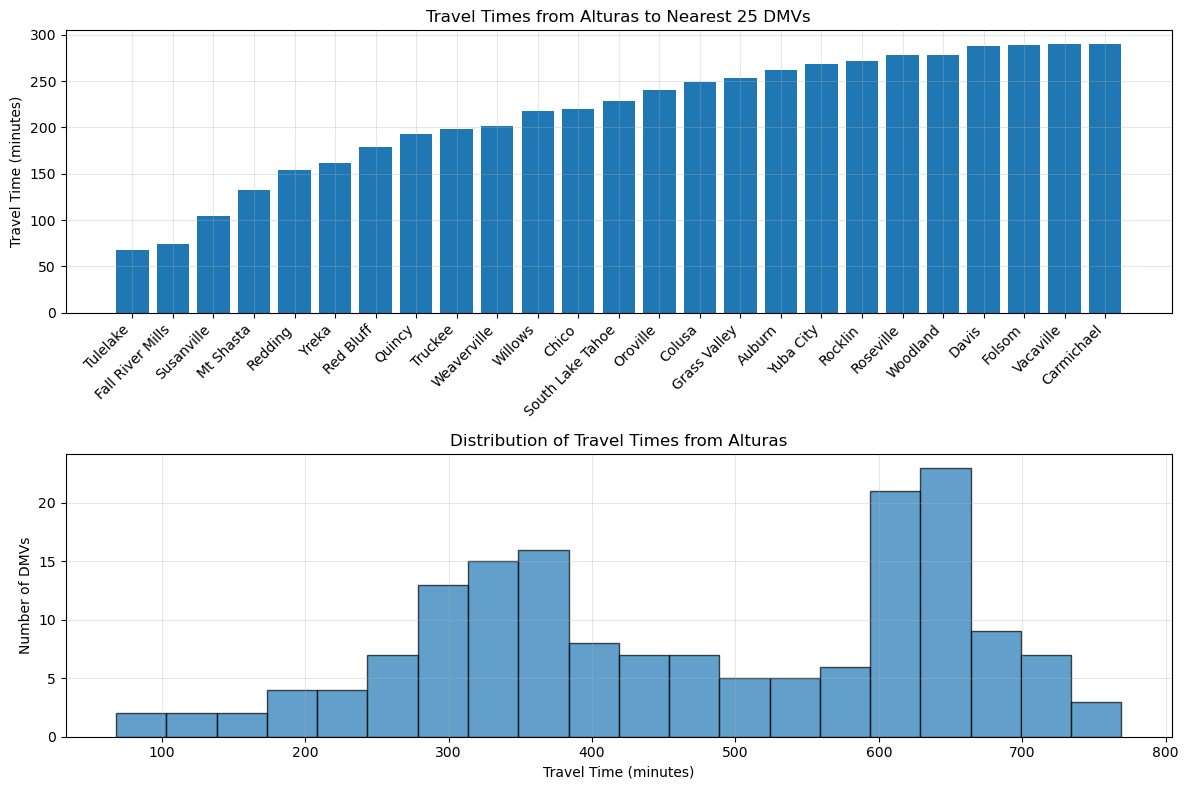


HEATMAP VISUALIZATION


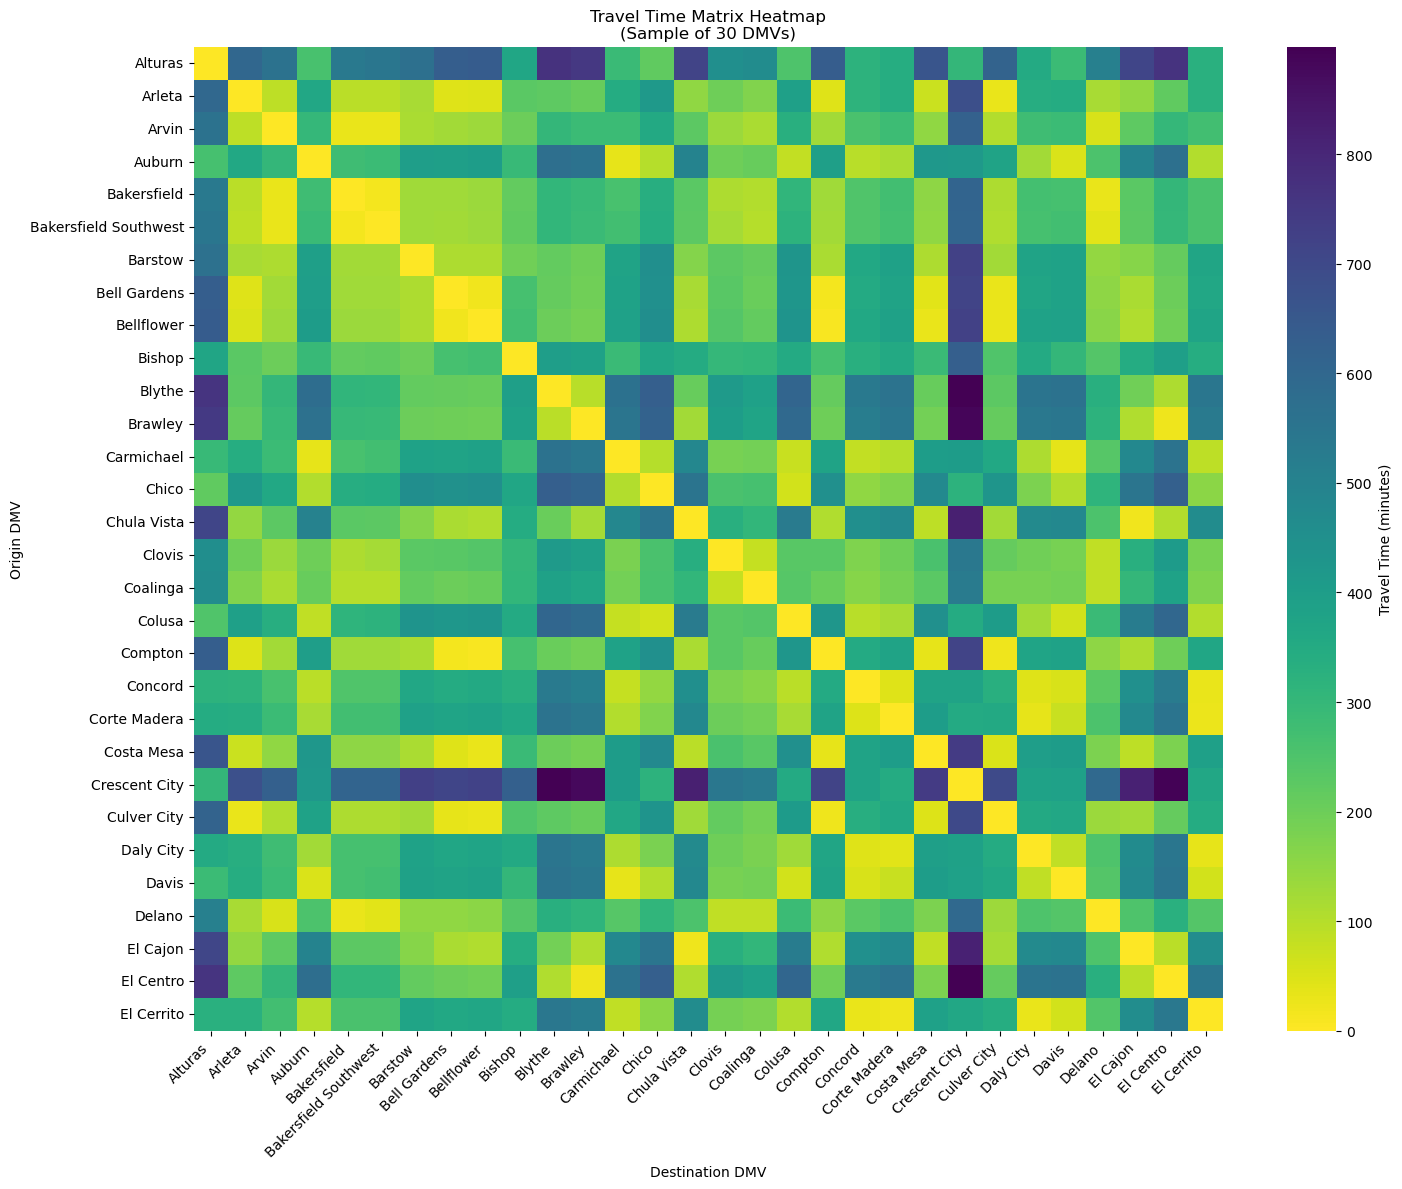

Matrix saved to dmv_travel_matrix.csv

USAGE EXAMPLES:
# To analyze a specific DMV:
# analyze_specific_dmv(df_matrix, 'Los Angeles')

# To get travel times from one DMV to all others:
# alturas_times = df_matrix.loc['Alturas'].dropna().sort_values()

# To find DMVs within X minutes of a location:
# nearby = df_matrix.loc['Alturas'][(df_matrix.loc['Alturas'] <= 60) & (df_matrix.loc['Alturas'] > 0)]


In [15]:

def load_and_process_travel_data(json_file_path):
    """
    Load JSON data and create a travel time matrix
    """
    # Load the JSON data
    with open(json_file_path, 'r') as f:
        travel_data = json.load(f)
    
    print(f"Loaded {len(travel_data)} travel time records")
    
    # Extract unique DMV office names
    origins = set()
    destinations = set()
    
    for record in travel_data:
        origins.add(record['origin_office_name'])
        destinations.add(record['destination_office_name'])
    
    # Get all unique DMV offices
    all_dmvs = sorted(list(origins.union(destinations)))
    print(f"Found {len(all_dmvs)} unique DMV offices")
    
    # Create a dictionary for quick lookup
    travel_dict = {}
    for record in travel_data:
        origin = record['origin_office_name']
        destination = record['destination_office_name']
        duration_str = record['duration']
        
        # Convert duration from "36018s" format to minutes
        duration_seconds = int(duration_str.replace('s', ''))
        duration_minutes = duration_seconds / 60
        
        # Store in dictionary
        if origin not in travel_dict:
            travel_dict[origin] = {}
        travel_dict[origin][destination] = duration_minutes
    
    return all_dmvs, travel_dict

def create_travel_matrix(all_dmvs, travel_dict):
    """
    Create a 167x167 travel time matrix
    """
    n_dmvs = len(all_dmvs)
    
    # Initialize matrix with NaN values
    matrix = np.full((n_dmvs, n_dmvs), np.nan)
    
    # Fill the matrix
    for i, origin in enumerate(all_dmvs):
        for j, destination in enumerate(all_dmvs):
            if origin == destination:
                # Same office = 0 travel time
                matrix[i, j] = 0
            elif origin in travel_dict and destination in travel_dict[origin]:
                # Use actual travel time
                matrix[i, j] = travel_dict[origin][destination]
            # else: remains NaN for missing data
    
    # Create DataFrame with DMV names as labels
    df_matrix = pd.DataFrame(matrix, index=all_dmvs, columns=all_dmvs)
    
    return df_matrix

def analyze_matrix(df_matrix):
    """
    Analyze the travel time matrix
    """
    print(f"Matrix shape: {df_matrix.shape}")
    print(f"Total cells: {df_matrix.size}")
    print(f"Non-NaN cells: {df_matrix.count().sum()}")
    print(f"NaN cells: {df_matrix.isna().sum().sum()}")
    print(f"Data coverage: {(df_matrix.count().sum() / df_matrix.size) * 100:.1f}%")
    
    # Statistics for non-NaN, non-zero values
    non_zero_data = df_matrix[(df_matrix > 0) & (~df_matrix.isna())]
    if len(non_zero_data) > 0:
        print(f"\nTravel Time Statistics (minutes):")
        print(f"Min: {non_zero_data.min().min():.1f}")
        print(f"Max: {non_zero_data.max().max():.1f}")
        print(f"Mean: {non_zero_data.mean().mean():.1f}")
        print(f"Median: {non_zero_data.median().median():.1f}")

def visualize_matrix(df_matrix, origin_dmv="Alturas", max_dmvs_to_show=20):
    """
    Visualize the travel time matrix focusing on one origin DMV
    """
    if origin_dmv not in df_matrix.index:
        print(f"DMV '{origin_dmv}' not found in data")
        return
    
    # Get travel times from the origin DMV
    origin_row = df_matrix.loc[origin_dmv].dropna().sort_values()
    
    # Remove self (0 minutes)
    origin_row = origin_row[origin_row > 0]
    
    print(f"\nTravel times from {origin_dmv} to other DMVs:")
    print(f"Closest {min(10, len(origin_row))} DMVs:")
    for i, (dest, time) in enumerate(origin_row.head(10).items()):
        print(f"{i+1:2d}. {dest}: {time:.1f} minutes")
    
    # Plot travel times from origin DMV
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Bar chart of travel times from origin
    plt.subplot(2, 1, 1)
    top_destinations = origin_row.head(max_dmvs_to_show)
    plt.bar(range(len(top_destinations)), top_destinations.values)
    plt.xticks(range(len(top_destinations)), top_destinations.index, rotation=45, ha='right')
    plt.ylabel('Travel Time (minutes)')
    plt.title(f'Travel Times from {origin_dmv} to Nearest {len(top_destinations)} DMVs')
    plt.grid(True, alpha=0.3)
    
    # Plot 2: Histogram of all travel times from origin
    plt.subplot(2, 1, 2)
    plt.hist(origin_row.values, bins=20, alpha=0.7, edgecolor='black')
    plt.xlabel('Travel Time (minutes)')
    plt.ylabel('Number of DMVs')
    plt.title(f'Distribution of Travel Times from {origin_dmv}')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return origin_row

def create_heatmap(df_matrix, sample_size=30):
    """
    Create a heatmap visualization of the travel time matrix (sample)
    """
    # Take a sample for visualization (full matrix would be too dense)
    sample_dmvs = df_matrix.index[:sample_size]
    sample_matrix = df_matrix.loc[sample_dmvs, sample_dmvs]
    
    plt.figure(figsize=(15, 12))
    
    # Create heatmap
    mask = sample_matrix.isna()
    sns.heatmap(sample_matrix, 
                mask=mask,
                annot=False, 
                cmap='viridis_r',
                cbar_kws={'label': 'Travel Time (minutes)'},
                xticklabels=True,
                yticklabels=True)
    
    plt.title(f'Travel Time Matrix Heatmap\n(Sample of {sample_size} DMVs)')
    plt.xlabel('Destination DMV')
    plt.ylabel('Origin DMV')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

def save_matrix(df_matrix, filename='dmv_travel_matrix.csv'):
    """
    Save the matrix to CSV file
    """
    df_matrix.to_csv(filename)
    print(f"Matrix saved to {filename}")

# MAIN EXECUTION
def main():
    # Load and process data
    json_file = 'dmv_office_route_distances.json'  # Replace with your actual file path
    
    try:
        all_dmvs, travel_dict = load_and_process_travel_data(json_file)
        
        # Create travel time matrix
        print("\nCreating travel time matrix...")
        df_matrix = create_travel_matrix(all_dmvs, travel_dict)
        
        # Analyze the matrix
        print("\n" + "="*50)
        print("MATRIX ANALYSIS")
        print("="*50)
        analyze_matrix(df_matrix)
        
        # Focus on Alturas (or any DMV you want)
        print("\n" + "="*50)
        print("ALTURAS TRAVEL TIMES")
        print("="*50)
        alturas_times = visualize_matrix(df_matrix, origin_dmv="Alturas", max_dmvs_to_show=25)
        
        # Create heatmap visualization
        print("\n" + "="*50)
        print("HEATMAP VISUALIZATION")
        print("="*50)
        create_heatmap(df_matrix, sample_size=30)
        
        # Save the matrix
        save_matrix(df_matrix)
        
        # Return the matrix for further analysis
        return df_matrix
        
    except FileNotFoundError:
        print(f"Error: Could not find file '{json_file}'")
        print("Please update the 'json_file' variable with the correct path to your JSON file")
        return None
    except Exception as e:
        print(f"Error processing data: {str(e)}")
        return None

# Example of how to use specific functions
def analyze_specific_dmv(df_matrix, dmv_name):
    """
    Analyze travel times for a specific DMV
    """
    if dmv_name not in df_matrix.index:
        print(f"DMV '{dmv_name}' not found. Available DMVs:")
        print(df_matrix.index.tolist()[:10], "... and more")
        return
    
    travel_times = visualize_matrix(df_matrix, origin_dmv=dmv_name, max_dmvs_to_show=20)
    return travel_times

# Run the main analysis
if __name__ == "__main__":
    df_matrix = main()

print("\n" + "="*50)
print("USAGE EXAMPLES:")
print("="*50)
print("# To analyze a specific DMV:")
print("# analyze_specific_dmv(df_matrix, 'Los Angeles')")
print("\n# To get travel times from one DMV to all others:")
print("# alturas_times = df_matrix.loc['Alturas'].dropna().sort_values()")
print("\n# To find DMVs within X minutes of a location:")
print("# nearby = df_matrix.loc['Alturas'][(df_matrix.loc['Alturas'] <= 60) & (df_matrix.loc['Alturas'] > 0)]")

In [7]:
# Change this line to your actual JSON file path
traveltimes_car_json_file = 'dmv_office_route_distances.json'  # Update this!

In [8]:


def json_to_dataframe(json_file_path):
    """
    Convert JSON travel data to a pandas DataFrame
    
    Args:
        json_file_path: Path to your JSON file
    
    Returns:
        df: DataFrame with travel time data
    """
    print(f"Loading JSON file: {json_file_path}")
    
    # Load JSON data
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    
    print(f"Loaded {len(data)} records")
    
    # Convert to DataFrame
    df = pd.DataFrame(data)
    
    # Convert duration from "36018s" to minutes
    if 'duration' in df.columns:
        df['duration_seconds'] = df['duration'].str.replace('s', '').astype(int)
        df['duration_minutes'] = df['duration_seconds'] / 60
    
    # Convert distance from meters to kilometers if present
    if 'distanceMeters' in df.columns:
        df['distance_km'] = df['distanceMeters'] / 1000
    
    print(f"DataFrame shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    return df

def create_travel_matrix_from_dataframe(df):
    """
    Create a 167x167 travel time matrix from the DataFrame
    
    Args:
        df: DataFrame with travel data
    
    Returns:
        matrix_df: 167x167 DataFrame with DMV names as index/columns
    """
    print("Creating travel time matrix...")
    
    # Get unique DMV names
    origins = df['origin_office_name'].unique()
    destinations = df['destination_office_name'].unique()
    all_dmvs = sorted(list(set(origins) | set(destinations)))
    
    print(f"Found {len(all_dmvs)} unique DMV offices")
    
    # Create empty matrix
    matrix = pd.DataFrame(index=all_dmvs, columns=all_dmvs, dtype=float)
    
    # Fill diagonal with zeros (same DMV = 0 travel time)
    np.fill_diagonal(matrix.values, 0)
    
    # Fill matrix with travel times
    for _, row in df.iterrows():
        origin = row['origin_office_name']
        destination = row['destination_office_name']
        duration_minutes = row['duration_minutes']
        
        matrix.loc[origin, destination] = duration_minutes
    
    print(f"Matrix shape: {matrix.shape}")
    print(f"Non-null values: {matrix.count().sum()}")
    print(f"Coverage: {matrix.count().sum() / matrix.size * 100:.1f}%")
    
    return matrix

def analyze_dataframe(df):
    """
    Analyze the travel data DataFrame
    """
    print("="*50)
    print("DATAFRAME ANALYSIS")
    print("="*50)
    
    # Basic info
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print()
    
    # Travel time statistics
    if 'duration_minutes' in df.columns:
        print("Travel Time Statistics:")
        print(f"  Min: {df['duration_minutes'].min():.1f} minutes")
        print(f"  Max: {df['duration_minutes'].max():.1f} minutes")
        print(f"  Mean: {df['duration_minutes'].mean():.1f} minutes")
        print(f"  Median: {df['duration_minutes'].median():.1f} minutes")
        print()
    
    # Distance statistics
    if 'distance_km' in df.columns:
        print("Distance Statistics:")
        print(f"  Min: {df['distance_km'].min():.1f} km")
        print(f"  Max: {df['distance_km'].max():.1f} km")
        print(f"  Mean: {df['distance_km'].mean():.1f} km")
        print(f"  Median: {df['distance_km'].median():.1f} km")
        print()
    
    # DMV counts
    print("DMV Analysis:")
    print(f"  Unique origins: {df['origin_office_name'].nunique()}")
    print(f"  Unique destinations: {df['destination_office_name'].nunique()}")
    print(f"  Total unique DMVs: {len(set(df['origin_office_name']) | set(df['destination_office_name']))}")
    print()
    
    # Top origins (most routes from)
    print("Top 10 Origins (most outbound routes):")
    origin_counts = df['origin_office_name'].value_counts().head(10)
    for dmv, count in origin_counts.items():
        print(f"  {dmv}: {count} routes")
    print()
    
    # Sample data
    print("Sample data:")
    print(df.head())
    
    return df

def filter_dataframe(df, origin_dmv=None, max_time_minutes=None, min_time_minutes=None):
    """
    Filter the DataFrame based on various criteria
    """
    filtered_df = df.copy()
    
    if origin_dmv:
        filtered_df = filtered_df[filtered_df['origin_office_name'] == origin_dmv]
        print(f"Filtered to {len(filtered_df)} routes from {origin_dmv}")
    
    if max_time_minutes:
        filtered_df = filtered_df[filtered_df['duration_minutes'] <= max_time_minutes]
        print(f"Filtered to {len(filtered_df)} routes under {max_time_minutes} minutes")
    
    if min_time_minutes:
        filtered_df = filtered_df[filtered_df['duration_minutes'] >= min_time_minutes]
        print(f"Filtered to {len(filtered_df)} routes over {min_time_minutes} minutes")
    
    return filtered_df

def get_routes_from_dmv(df, dmv_name):
    """
    Get all routes from a specific DMV
    """
    routes = df[df['origin_office_name'] == dmv_name].copy()
    
    if len(routes) == 0:
        print(f"No routes found from {dmv_name}")
        available = df['origin_office_name'].unique()
        print(f"Available DMVs: {sorted(available)[:10]}...")
        return None
    
    # Sort by travel time
    routes = routes.sort_values('duration_minutes')
    
    print(f"Found {len(routes)} routes from {dmv_name}")
    print(f"Shortest: {routes.iloc[0]['destination_office_name']} ({routes.iloc[0]['duration_minutes']:.1f} min)")
    print(f"Longest: {routes.iloc[-1]['destination_office_name']} ({routes.iloc[-1]['duration_minutes']:.1f} min)")
    
    return routes

def save_dataframe(df, filename='travel_data.csv'):
    """
    Save DataFrame to CSV file
    """
    df.to_csv(filename, index=False)
    print(f"DataFrame saved to {filename}")

# MAIN EXECUTION FUNCTION
def process_json_to_dataframe(json_file_path):
    """
    Complete workflow: JSON -> DataFrame -> Matrix
    """
    try:
        # Step 1: Load JSON and convert to DataFrame
        df = json_to_dataframe(json_file_path)
        
        # Step 2: Analyze the DataFrame
        print("\n" + "="*50)
        print("ANALYZING TRAVEL DATA")
        print("="*50)
        analyze_dataframe(df)
        
        # Step 3: Create travel time matrix
        print("\n" + "="*50)
        print("CREATING TRAVEL MATRIX")
        print("="*50)
        matrix_df = create_travel_matrix_from_dataframe(df)
        
        # Step 4: Show example data
        print("\n" + "="*50)
        print("EXAMPLE ANALYSIS")
        print("="*50)
        
        # Example: Routes from Alturas
        alturas_routes = get_routes_from_dmv(df, 'Alturas')
        if alturas_routes is not None:
            print("\nClosest 5 DMVs to Alturas:")
            for _, route in alturas_routes.head(5).iterrows():
                print(f"  {route['destination_office_name']}: {route['duration_minutes']:.1f} min")
        
        # Example: Travel times within 1 hour
        nearby_routes = filter_dataframe(df, origin_dmv='Alturas', max_time_minutes=60)
        
        return df, matrix_df
        
    except FileNotFoundError:
        print(f"Error: File '{json_file_path}' not found")
        return None, None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None, None

# USAGE EXAMPLES
def show_usage_examples():
    """
    Show how to use the functions
    """
    print("\n" + "="*50)
    print("USAGE EXAMPLES")
    print("="*50)
    
    print("# 1. Load JSON and convert to DataFrame:")
    print("df, matrix_df = process_json_to_dataframe('your_file.json')")
    print()
    
    print("# 2. Get routes from specific DMV:")
    print("alturas_routes = get_routes_from_dmv(df, 'Alturas')")
    print()
    
    print("# 3. Filter routes by time:")
    print("short_routes = filter_dataframe(df, max_time_minutes=60)")
    print("long_routes = filter_dataframe(df, min_time_minutes=180)")
    print()
    
    print("# 4. Access matrix data:")
    print("travel_time = matrix_df.loc['Alturas', 'Los Angeles']")
    print("alturas_row = matrix_df.loc['Alturas'].dropna().sort_values()")
    print()
    
    print("# 5. Save data:")
    print("save_dataframe(df, 'travel_routes.csv')")
    print("matrix_df.to_csv('travel_matrix.csv')")

# Run if called directly
if __name__ == "__main__":
    # Replace with your actual JSON file path
    json_file = 'dmv_office_route_distances.json'  # UPDATE THIS PATH!
    
    print("🚗 JSON TO DATAFRAME CONVERTER")
    print("="*50)
    
    # Process the JSON file
    df, matrix_df = process_json_to_dataframe(json_file)
    
    if df is not None:
        print("\n✅ SUCCESS! DataFrames created:")
        print(f"  - df: {df.shape} (route data)")
        print(f"  - matrix_df: {matrix_df.shape} (travel time matrix)")
        
        # Save the results
        save_dataframe(df, 'dmv_travel_routes.csv')
        matrix_df.to_csv('dmv_travel_matrix.csv')
        
    show_usage_examples()

🚗 JSON TO DATAFRAME CONVERTER
Loading JSON file: dmv_office_route_distances.json
Loaded 27722 records
DataFrame shape: (27722, 11)
Columns: ['origin_office_name', 'origin_latitude', 'origin_longitude', 'destination_office_name', 'destination_latitude', 'destination_longitude', 'distanceMeters', 'duration', 'duration_seconds', 'duration_minutes', 'distance_km']

ANALYZING TRAVEL DATA
DATAFRAME ANALYSIS
Shape: (27722, 11)
Columns: ['origin_office_name', 'origin_latitude', 'origin_longitude', 'destination_office_name', 'destination_latitude', 'destination_longitude', 'distanceMeters', 'duration', 'duration_seconds', 'duration_minutes', 'distance_km']

Travel Time Statistics:
  Min: 6.2 minutes
  Max: 898.3 minutes
  Mean: 269.6 minutes
  Median: 250.8 minutes

Distance Statistics:
  Min: 2.4 km
  Max: 1531.3 km
  Mean: 456.4 km
  Median: 421.1 km

DMV Analysis:
  Unique origins: 167
  Unique destinations: 167
  Total unique DMVs: 167

Top 10 Origins (most outbound routes):
  Yuba City: 16

In [7]:
!pip install geopandas
!pip install gudhi


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [8]:
import gudhi as gd
import gudhi.weighted_rips_complex

In [9]:
def get_tda_info(citypath, city, max_hom_dim = 1):
    '''
    citypath: string. path where data/travel time matrices are stored. 
        In TDA for Resource Access Drive, this is one of {Atlanta, Chicago, Jacksonville, Los Angeles, NYC, Salt Lake City}.
    city: {atl, chc, jax, lac, manbronx, queensbrook, stat, slc}
    Assume that distance matrix is already computed and saved at citypath + f'/{city}_d_matrix.npy'
    '''
    # Load distance matrix and wait times (the weights for the weighted Rips complex)
    D_city = np.load(citypath + f'/{city}_d_matrix.npy')
    #D_city = np.genfromtxt(citypath + f'/{city}_d_matrix.csv', delimiter = ",")
    wait_city = np.genfromtxt(citypath + f'/{city}_waits.csv', delimiter = ",")
    
    # Calculate simplex pairs for the homology classes
    cpx = gd.weighted_rips_complex.WeightedRipsComplex(distance_matrix = D_city, weights = wait_city).create_simplex_tree(max_dimension = max_hom_dim + 1)
    cpx.compute_persistence()
    ph = cpx.persistence()
    all_pairs = cpx.persistence_pairs()
    return cpx, ph, all_pairs

In [10]:
cpx.persistence_pairs()

NameError: name 'cpx' is not defined

In [11]:
from shapely.geometry import LineString, Polygon
import scipy.stats

def plot_deathsimplices(citypath, city, cpx, all_pairs, hom_dim, ax, criteria = 'death', zscore_thresh = 1, citydf_fname = None, vmin0 = 3235, vmin1 = 4410, vmax0 = 7380, vmax1 = 7942, legend = False):
    '''
    citypath: string. path where data/travel time matrices are stored. 
        In TDA for Resource Access Drive, this is one of {Atlanta, Chicago, Jacksonville, Los Angeles, NYC, Salt Lake City}.
    city: {atl, chc, jax, lac, lac_NoCatalina, nyc, slc}
    cpx: The filtered complex, as computed by get_cpx_spxpairs. Assume ph has already been computed
    all_pairs: All (birth simplex, death simplex) pairs for the ph of cpx, as computed by get_cpx_spxpairs
    hom_dim: {0, 1}. Homology dimension.
    ax: ax to plot on. (This is passed as an argument so that we can overlay multiple death simplex plots on top of each other, e.g. for NYC)
    criteria: {'lifetime', 'death'}. For each homology class, either compute lifetimes (death - birth) or just death
    zscore_thresh: (float) optional , default 1. We compute the z-score for the criteria value for each homology class that has finite criteria value.
    vmax0: (float) optional, default 6500. we want this to be higher than the highest death filtration of 0th homology
    vmax1: (float) optional, default 8100. same thing as vmax0, but for 1st homology
    
    Plot death simplices for finite homology classes with an z-score above zscore_thresh, in dimension hom_dim.
    '''
    
    # Load geographic data
    if citydf_fname is None:
        city_df = gpd.read_file(citypath + f'/{city}_zip.geojson')
    else:
        city_df = gpd.read_file(citypath + "/" + citydf_fname)
    polls_df = gpd.read_file(citypath + f'/{city}_polls.geojson')
    
    # Get simplex pairs for homology classes in dimension hom_dim. Only get the finite homology classes (i.e., the ones that have a death simplex)
    pairs = [pair for pair in all_pairs if len(pair[1]) == hom_dim + 2]

    # Calculate criteria, sort death simplices by criteria, calculate z-scores
    if criteria == "death":
        deathspx_criteria = [[pair[1], cpx.filtration(pair[1])] for pair in pairs]
    elif criteria == "lifetime":
        deathspx_criteria = [[pair[1], cpx.filtration(pair[1]) - cpx.filtration(pair[0])] for pair in pairs]
    deathspx_criteria.sort(key = lambda row: row[1], reverse = True)
    death_simplices = [item[0] for item in deathspx_criteria]
    criteria_vals = [item[1] for item in deathspx_criteria]
    zscores = scipy.stats.zscore(criteria_vals)
    
    # Make geopandas dataframe where the polygons represent the death simplices
    if hom_dim == 0:
        df_deathsimplices = gpd.GeoDataFrame(geometry=[LineString([polls_df.geometry[deathspx[j]] for j in range(2)]).buffer(0.005) for deathspx in death_simplices])
    elif hom_dim == 1:
        df_deathsimplices = gpd.GeoDataFrame(geometry=[Polygon([polls_df.geometry[deathspx[j]] for j in range(3)]) for deathspx in death_simplices])
    df_deathsimplices['criteria'] = criteria_vals
    df_deathsimplices['zscore'] = zscores
    np.save(citypath+f'/{city}_death_simplices_by_{criteria}_in_dim_{hom_dim}.npy',df_deathsimplices)
    df_deathsimplices_truncated = df_deathsimplices[df_deathsimplices['zscore'] > zscore_thresh]
    
    # Plot
    ax.set_axis_off()
    city_df.plot(ax=ax, color='white', edgecolor='grey')
    polls_df.plot(ax=ax, markersize=1, color='blue')

    if hom_dim == 0:
        vmin = vmin0
        vmax = vmax0
    else:
        vmin = vmin0
        vmax = vmax1
    df_deathsimplices_truncated.plot('criteria', ax=ax, alpha=0.7, vmin = vmin, vmax = vmax, legend = legend)

Loading data...
Loaded 167 DMV offices
Distance matrix shape: (167, 168)
Distance matrix columns (first 5): ['Unnamed: 0', 'Alturas', 'Arleta', 'Arvin', 'Auburn']
Distance matrix first column name: 'Unnamed: 0'
First 5 office names from details: ['Alturas', 'Arleta', 'Arvin', 'Auburn', 'Bakersfield']
Successfully set index on distance matrix
Distance matrix index (first 5): ['Alturas', 'Arleta', 'Arvin', 'Auburn', 'Bakersfield']
Number of offices in distance matrix: 167
Matching offices: 167
✅ All offices match! Using proper indexing...
Final distance matrix shape: (167, 167)
Distance matrix sample (first 3x3):
[[  0.         598.64658409 559.20700644]
 [598.64658409   0.          89.04829954]
 [559.20700644  89.04829954   0.        ]]
Wait times shape: (167,)
Wait times range: 0-44 minutes
Final shapes - Distance matrix: (167, 167), Wait times: (167,)

Distance matrix validation:
Diagonal elements (should be 0): [0. 0. 0. 0. 0.]
Is symmetric: True
All non-negative: True

Creating weig

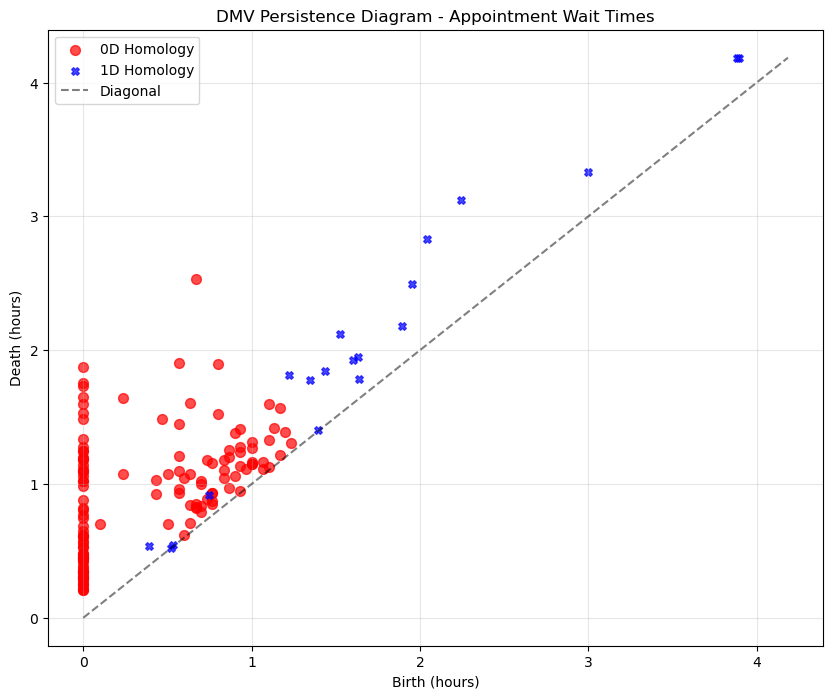


=== MOST PERSISTENT 1D FEATURES ===
1. Lifetime: 0.883 hours, Birth: 2.241, Death: 3.124
2. Lifetime: 0.784 hours, Birth: 2.044, Death: 2.828
3. Lifetime: 0.598 hours, Birth: 1.525, Death: 2.123
4. Lifetime: 0.592 hours, Birth: 1.222, Death: 1.814
5. Lifetime: 0.539 hours, Birth: 1.953, Death: 2.492

=== DEATH SIMPLICES ANALYSIS ===
Top 5 most significant 1D features (triangular arrangements):
1. Death filtration: 251.1, Offices: ['Truckee', 'South Lake Tahoe', 'Bishop']
2. Death filtration: 251.0, Offices: ['Mariposa', 'Bishop', 'Arvin']
3. Death filtration: 199.8, Offices: ['Yreka', 'Weaverville', 'Crescent City']
4. Death filtration: 187.5, Offices: ['Weaverville', 'Redding', 'Eureka']
5. Death filtration: 169.7, Offices: ['Rancho San Diego Industry Business Center', 'Palm Springs', 'Brawley']

✅ Analysis complete!

=== TROUBLESHOOTING COMPLETE ===
If you're still getting errors, try:
1. Check that both CSV files are in the current directory
2. Verify that the office names match be

In [12]:
# DMV TDA Analysis - Fixed Indexing Issues

import pandas as pd
import numpy as np
import gudhi as gd

# Define the maximum homology dimension
max_hom_dim = 1

print("Loading data...")

# Load the DMV office details
dmv_df = pd.read_csv('dmv_offices_details.csv')
print(f"Loaded {len(dmv_df)} DMV offices")

# Load distance matrix - BE CAREFUL with indexing
distance_df = pd.read_csv('dmv_Symmetric_Distance_Matrix.csv')
print(f"Distance matrix shape: {distance_df.shape}")

# Check the structure of the distance matrix
print("Distance matrix columns (first 5):", distance_df.columns[:5].tolist())
print("Distance matrix first column name:", repr(distance_df.columns[0]))

# Get office names from DMV details
offices = dmv_df['office_name'].tolist()
print(f"First 5 office names from details: {offices[:5]}")

# METHOD 1: Try to use the distance matrix as-is (assuming first column is index)
try:
    # Set the first column as index if it's not already
    if distance_df.columns[0] == '' or distance_df.columns[0] == 'Unnamed: 0':
        distance_df_indexed = distance_df.set_index(distance_df.columns[0])
    else:
        distance_df_indexed = distance_df.set_index(distance_df.iloc[:, 0])
    
    print("Successfully set index on distance matrix")
    print("Distance matrix index (first 5):", distance_df_indexed.index[:5].tolist())
    
    # Check if office names match
    distance_offices = distance_df_indexed.index.tolist()
    print(f"Number of offices in distance matrix: {len(distance_offices)}")
    
    # Find matching offices
    matching_offices = [office for office in offices if office in distance_offices]
    print(f"Matching offices: {len(matching_offices)}")
    
    if len(matching_offices) == len(offices):
        print("✅ All offices match! Using proper indexing...")
        D_matrix = distance_df_indexed.loc[offices, offices].values
    else:
        print("⚠️ Not all offices match. Using position-based indexing...")
        # Use the first len(offices) rows and columns
        D_matrix = distance_df_indexed.iloc[:len(offices), :len(offices)].values
        
except Exception as e:
    print(f"❌ Indexing method 1 failed: {e}")
    print("Trying alternative method...")
    
    # METHOD 2: Use position-based indexing
    # Assume the distance matrix is in the same order as the DMV details
    distance_values = distance_df.iloc[:, 1:].values  # Skip first column (names)
    
    # Take only the number of offices we have
    n_offices = len(offices)
    D_matrix = distance_values[:n_offices, :n_offices]
    print(f"✅ Using position-based indexing. Matrix shape: {D_matrix.shape}")

print(f"Final distance matrix shape: {D_matrix.shape}")
print(f"Distance matrix sample (first 3x3):")
print(D_matrix[:3, :3])

# Get wait times
wait_times = dmv_df['appointment_wait_minutes'].values
print(f"Wait times shape: {wait_times.shape}")
print(f"Wait times range: {wait_times.min()}-{wait_times.max()} minutes")

# Ensure both arrays have the same length
if D_matrix.shape[0] != len(wait_times):
    min_size = min(D_matrix.shape[0], len(wait_times))
    D_matrix = D_matrix[:min_size, :min_size]
    wait_times = wait_times[:min_size]
    offices = offices[:min_size]
    print(f"⚠️ Adjusted sizes to match: {min_size} offices")

print(f"Final shapes - Distance matrix: {D_matrix.shape}, Wait times: {wait_times.shape}")

# Verify the distance matrix makes sense
print("\nDistance matrix validation:")
print(f"Diagonal elements (should be 0): {D_matrix.diagonal()[:5]}")
print(f"Is symmetric: {np.allclose(D_matrix, D_matrix.T)}")
print(f"All non-negative: {np.all(D_matrix >= 0)}")

try:
    print("\nCreating weighted Rips complex...")
    
    # Create the weighted Rips complex
    cpx = gd.weighted_rips_complex.WeightedRipsComplex(
        distance_matrix=D_matrix,
        weights=wait_times
    ).create_simplex_tree(max_dimension=max_hom_dim + 1)
    
    print("✅ Successfully created simplex tree!")
    
    # Compute persistence
    print("Computing persistence...")
    cpx.compute_persistence()
    ph = cpx.persistence()
    all_pairs = cpx.persistence_pairs()
    
    print(f"✅ Persistence computed!")
    print(f"Total features: {len(ph)}")
    print(f"0D features: {len([p for p in ph if p[0] == 0])}")
    print(f"1D features: {len([p for p in ph if p[0] == 1])}")
    
    # Convert to hours for analysis
    ph_hours = []
    for i, elt in enumerate(ph):
        ph_hours.append((elt[0], (elt[1][0]/60, elt[1][1]/60)))
    
    # Extract features for plotting
    births_0d = [p[1][0] for p in ph_hours if p[0] == 0 and p[1][1] != float('inf')]
    deaths_0d = [p[1][1] for p in ph_hours if p[0] == 0 and p[1][1] != float('inf')]
    births_1d = [p[1][0] for p in ph_hours if p[0] == 1 and p[1][1] != float('inf')]
    deaths_1d = [p[1][1] for p in ph_hours if p[0] == 1 and p[1][1] != float('inf')]
    
    print(f"Finite 0D features: {len(births_0d)}")
    print(f"Finite 1D features: {len(births_1d)}")
    
    # Plot persistence diagram
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 8))
    
    if births_0d:
        plt.scatter(births_0d, deaths_0d, c='red', s=50, alpha=0.7, label='0D Homology')
    if births_1d:
        plt.scatter(births_1d, deaths_1d, c='blue', s=30, alpha=0.7, marker='X', label='1D Homology')
    
    # Add diagonal line
    if births_0d + births_1d:
        max_val = max(deaths_0d + deaths_1d + births_0d + births_1d)
        plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Diagonal')
    
    plt.xlabel("Birth (hours)")
    plt.ylabel("Death (hours)")
    plt.title("DMV Persistence Diagram - Appointment Wait Times")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Analyze most persistent features
    if births_1d:
        print("\n=== MOST PERSISTENT 1D FEATURES ===")
        lifetimes_1d = [(deaths_1d[i] - births_1d[i], i) for i in range(len(births_1d))]
        lifetimes_1d.sort(reverse=True)
        
        for rank, (lifetime, idx) in enumerate(lifetimes_1d[:5]):
            print(f"{rank+1}. Lifetime: {lifetime:.3f} hours, Birth: {births_1d[idx]:.3f}, Death: {deaths_1d[idx]:.3f}")
    
    # Analyze death simplices to identify specific offices
    print("\n=== DEATH SIMPLICES ANALYSIS ===")
    pairs_1d = [pair for pair in all_pairs if len(pair[1]) == 3]  # 1D features have 3 vertices
    
    if pairs_1d:
        feature_data = [[pair[1], cpx.filtration(pair[1])] for pair in pairs_1d]
        feature_data.sort(key=lambda x: x[1], reverse=True)
        
        print("Top 5 most significant 1D features (triangular arrangements):")
        for i, (simplex, death_val) in enumerate(feature_data[:5]):
            office_names = [offices[vertex] for vertex in simplex]
            print(f"{i+1}. Death filtration: {death_val:.1f}, Offices: {office_names}")
    
    print("\n✅ Analysis complete!")
    
except Exception as e:
    print(f"❌ Error in TDA computation: {e}")
    print("This might be due to:")
    print("1. Distance matrix format issues")
    print("2. Incompatible data types")
    print("3. Memory issues with large matrix")
    
    # Debug information
    print(f"\nDebug info:")
    print(f"Distance matrix type: {type(D_matrix)}")
    print(f"Distance matrix dtype: {D_matrix.dtype}")
    print(f"Wait times type: {type(wait_times)}")
    print(f"Wait times dtype: {wait_times.dtype}")
    print(f"Any NaN in distance matrix: {np.isnan(D_matrix).any()}")
    print(f"Any NaN in wait times: {np.isnan(wait_times).any()}")

print("\n=== TROUBLESHOOTING COMPLETE ===")
print("If you're still getting errors, try:")
print("1. Check that both CSV files are in the current directory")
print("2. Verify that the office names match between files")
print("3. Make sure the distance matrix is properly formatted")
print("4. Consider using a smaller subset of offices for testing")

In [13]:
# Check total 0D features (including infinite ones)
all_0d_features = [p for p in ph if p[0] == 0]
finite_0d_features = [p for p in ph if p[0] == 0 and p[1][1] != float('inf')]
infinite_0d_features = [p for p in ph if p[0] == 0 and p[1][1] == float('inf')]

print(f"Total 0D features: {len(all_0d_features)}")
print(f"Finite 0D features: {len(finite_0d_features)}")  
print(f"Infinite 0D features: {len(infinite_0d_features)}")

Total 0D features: 130
Finite 0D features: 129
Infinite 0D features: 1


In [14]:
print(f"DMV dataframe shape: {dmv_df.shape}")
print(f"Distance matrix shape: {D_matrix.shape}")
print(f"Wait times shape: {wait_times.shape}")
print(f"Offices list length: {len(offices)}")

DMV dataframe shape: (167, 12)
Distance matrix shape: (167, 167)
Wait times shape: (167,)
Offices list length: 167


In [15]:
# Check for offices with identical wait times
wait_times = dmv_df['appointment_wait_minutes'].values
unique_waits, counts = np.unique(wait_times, return_counts=True)
duplicate_waits = unique_waits[counts > 1]

print("Wait times that appear multiple times:")
for wait_time in duplicate_waits:
    indices = np.where(wait_times == wait_time)[0]
    office_names_with_same_wait = [offices[i] for i in indices]
    print(f"Wait time {wait_time}: {len(indices)} offices")
    print(f"  Offices: {office_names_with_same_wait[:5]}...")  # Show first 5

Wait times that appear multiple times:
Wait time 0: 64 offices
  Offices: ['Alturas', 'Auburn', 'Blythe', 'Chico', 'Coalinga']...
Wait time 7: 2 offices
  Offices: ['Delano', 'Twentynine Palms']...
Wait time 13: 2 offices
  Offices: ['Thousand Oaks', 'Tulare']...
Wait time 15: 2 offices
  Offices: ['Santa Barbara', 'Santa Monica']...
Wait time 17: 6 offices
  Offices: ['Lompoc', 'Merced', 'Needles', 'Pasadena', 'San Luis Obispo']...
Wait time 18: 2 offices
  Offices: ['Fresno Commercial Drive Test Center', 'Rancho Cucamonga']...
Wait time 19: 4 offices
  Offices: ['Chula Vista', 'Lancaster', 'Porterville', 'Santa Paula']...
Wait time 20: 4 offices
  Offices: ['Bishop', 'Fresno North', 'Glendale', 'Goleta']...
Wait time 21: 5 offices
  Offices: ['Fresno', 'Long Beach', 'Montebello', 'Napa', 'Winnetka']...
Wait time 22: 4 offices
  Offices: ['Bellflower', 'Jackson', 'Paso Robles', 'Simi Valley']...
Wait time 23: 6 offices
  Offices: ['Arleta', 'Culver City', 'Los Banos', 'Palm Desert', '

In [16]:
# Count how many components are formed from the duplicate wait times
wait_times = dmv_df['appointment_wait_minutes'].values
unique_waits, counts = np.unique(wait_times, return_counts=True)

initial_components = 167  # Start with 167 offices
for count in counts:
    if count > 1:
        # Each group of 'count' offices becomes 1 component
        # So we lose (count - 1) components
        initial_components -= (count - 1)

print(f"Expected initial connected components: {initial_components}")

Expected initial connected components: 32


In [17]:
# Check the smallest non-zero filtration values
all_filtrations = []
for pair in all_pairs:
    birth_val = cpx.filtration(pair[0])
    death_val = cpx.filtration(pair[1])
    all_filtrations.extend([birth_val, death_val])

unique_filtrations = sorted(set(all_filtrations))
print(f"Smallest filtration values: {unique_filtrations[:10]}")
print(f"Number of features born at 0: {sum(1 for f in all_filtrations if f == 0)}")

Smallest filtration values: [0.0, 6.0, 12.316630985126668, 12.354188107301882, 13.311735922164132, 14.0, 14.468191366894382, 15.23767871669271, 16.114985216919084, 17.422027285600112]
Number of features born at 0: 64



=== LIFETIME STATISTICS ===
0D lifetimes - Mean: 0.565 hours, Std: 0.449 hours
0D lifetimes - Min: 0.017 hours, Max: 1.874 hours
1D lifetimes - Mean: 0.346 hours, Std: 0.243 hours
1D lifetimes - Min: 0.001 hours, Max: 0.883 hours

=== THRESHOLD ANALYSIS ===
mean           : 0.537 hours -> 47 0D, 5 1D features
mean + 1*std   : 0.972 hours -> 28 0D, 0 1D features
mean + 2*std   : 1.407 hours -> 9 0D, 0 1D features
75th percentile: 0.729 hours -> 35 0D, 2 1D features
90th percentile: 1.188 hours -> 15 0D, 0 1D features
95th percentile: 1.459 hours -> 8 0D, 0 1D features
Gap-based threshold: 0.598 hours (largest gap in distribution)


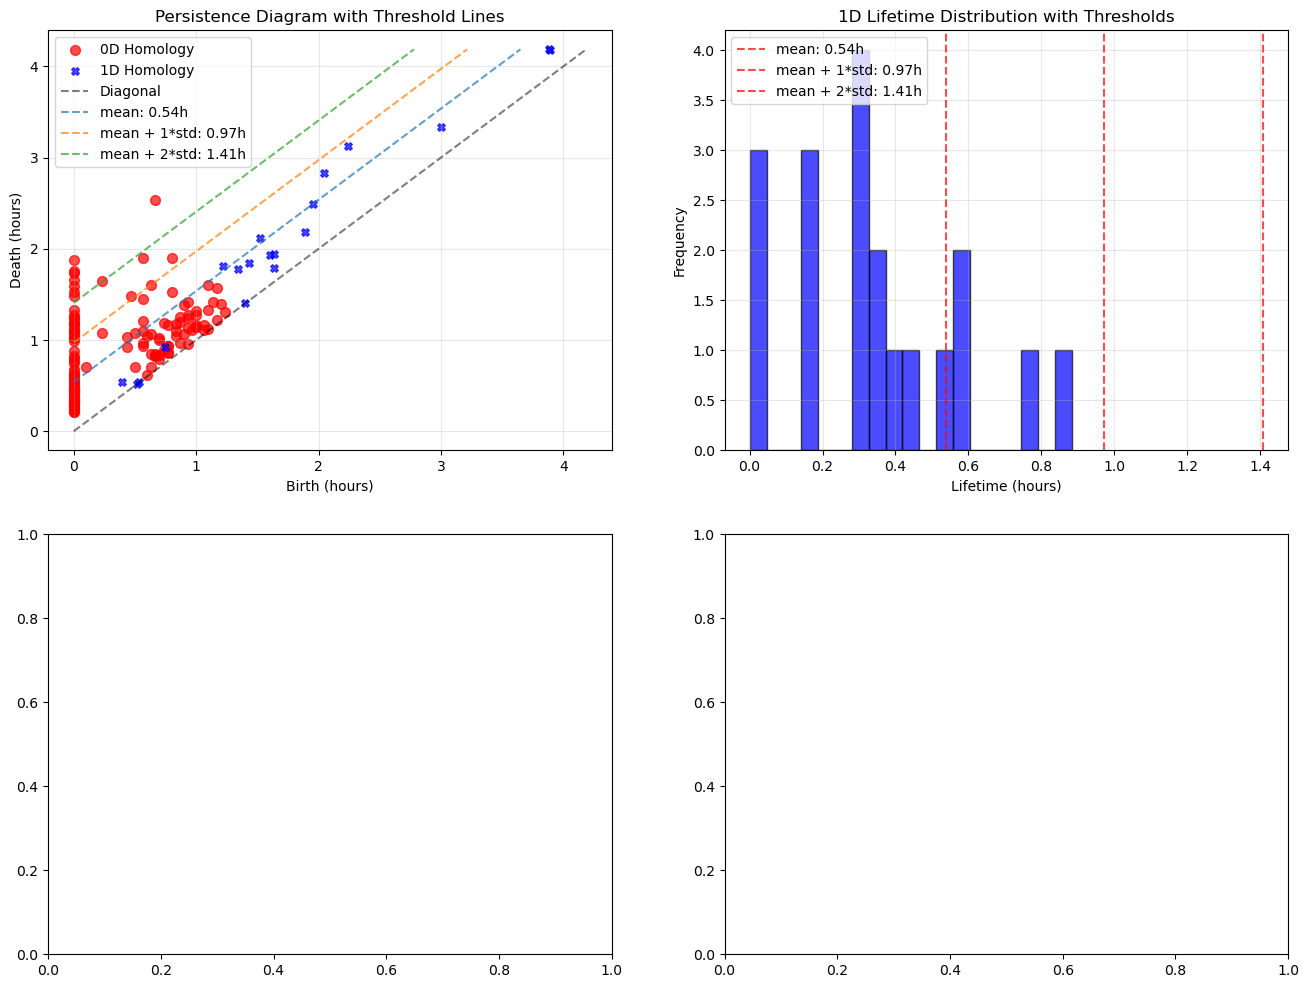

In [18]:
# First, let's fix the variable name issue and add threshold analysis
# Add this section after your persistence computation

# Calculate lifetimes (persistence = death - birth)
lifetimes_0d = [deaths_0d[i] - births_0d[i] for i in range(len(deaths_0d))]
lifetimes_1d = [deaths_1d[i] - births_1d[i] for i in range(len(deaths_1d))]

print(f"\n=== LIFETIME STATISTICS ===")
if lifetimes_0d:
    print(f"0D lifetimes - Mean: {np.mean(lifetimes_0d):.3f} hours, Std: {np.std(lifetimes_0d):.3f} hours")
    print(f"0D lifetimes - Min: {np.min(lifetimes_0d):.3f} hours, Max: {np.max(lifetimes_0d):.3f} hours")

if lifetimes_1d:
    print(f"1D lifetimes - Mean: {np.mean(lifetimes_1d):.3f} hours, Std: {np.std(lifetimes_1d):.3f} hours")
    print(f"1D lifetimes - Min: {np.min(lifetimes_1d):.3f} hours, Max: {np.max(lifetimes_1d):.3f} hours")

# THRESHOLD ANALYSIS - Multiple approaches
print(f"\n=== THRESHOLD ANALYSIS ===")

# Method 1: Statistical thresholds
all_lifetimes = lifetimes_0d + lifetimes_1d
if all_lifetimes:
    mean_lifetime = np.mean(all_lifetimes)
    std_lifetime = np.std(all_lifetimes)
    
    # Common thresholds
    thresholds = {
        'mean': mean_lifetime,
        'mean + 1*std': mean_lifetime + std_lifetime,
        'mean + 2*std': mean_lifetime + 2*std_lifetime,
        '75th percentile': np.percentile(all_lifetimes, 75),
        '90th percentile': np.percentile(all_lifetimes, 90),
        '95th percentile': np.percentile(all_lifetimes, 95)
    }
    
    for name, threshold in thresholds.items():
        count_0d = sum(1 for lt in lifetimes_0d if lt >= threshold)
        count_1d = sum(1 for lt in lifetimes_1d if lt >= threshold)
        print(f"{name:15s}: {threshold:.3f} hours -> {count_0d} 0D, {count_1d} 1D features")

# Method 2: Gap-based threshold (look for gaps in lifetime distribution)
if lifetimes_1d:
    sorted_lifetimes_1d = sorted(lifetimes_1d, reverse=True)
    gaps = [sorted_lifetimes_1d[i] - sorted_lifetimes_1d[i+1] for i in range(len(sorted_lifetimes_1d)-1)]
    if gaps:
        max_gap_idx = np.argmax(gaps)
        gap_threshold = sorted_lifetimes_1d[max_gap_idx + 1]
        print(f"Gap-based threshold: {gap_threshold:.3f} hours (largest gap in distribution)")

# VISUALIZATION 1: Persistence diagram with threshold lines
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original persistence diagram with threshold lines
ax1 = axes[0, 0]
if births_0d:
    ax1.scatter(births_0d, deaths_0d, c='red', s=50, alpha=0.7, label='0D Homology')
if births_1d:
    ax1.scatter(births_1d, deaths_1d, c='blue', s=30, alpha=0.7, marker='X', label='1D Homology')

# Add diagonal line
if births_0d + births_1d:
    max_val = max(deaths_0d + deaths_1d + births_0d + births_1d)
    ax1.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Diagonal')
    
    # Add threshold lines (parallel to diagonal)
    for name, threshold in list(thresholds.items())[:3]:  # Show first 3 thresholds
        ax1.plot([0, max_val-threshold], [threshold, max_val], 
                 '--', alpha=0.7, label=f'{name}: {threshold:.2f}h')

ax1.set_xlabel("Birth (hours)")
ax1.set_ylabel("Death (hours)")
ax1.set_title("Persistence Diagram with Threshold Lines")
ax1.legend()
ax1.grid(True, alpha=0.3)

# VISUALIZATION 2: Lifetime distribution with threshold markers
ax2 = axes[0, 1]
if lifetimes_1d:
    ax2.hist(lifetimes_1d, bins=min(20, len(lifetimes_1d)), alpha=0.7, color='blue', edgecolor='black')
    
    # Add threshold lines
    for name, threshold in list(thresholds.items())[:3]:
        ax2.axvline(threshold, color='red', linestyle='--', alpha=0.7, label=f'{name}: {threshold:.2f}h')
    
    ax2.set_title('1D Lifetime Distribution with Thresholds')
    ax2.set_xlabel('Lifetime (hours)')
    ax2.set_ylabel('Frequency')
    ax2.legend()
    ax2.grid(True, alpha=0.3)


=== PLOTTING ALL CALIFORNIA DMV TRIANGLES ===
Plotting ALL California DMV triangles...
Using actual geographic coordinates
Found 19 triangular features


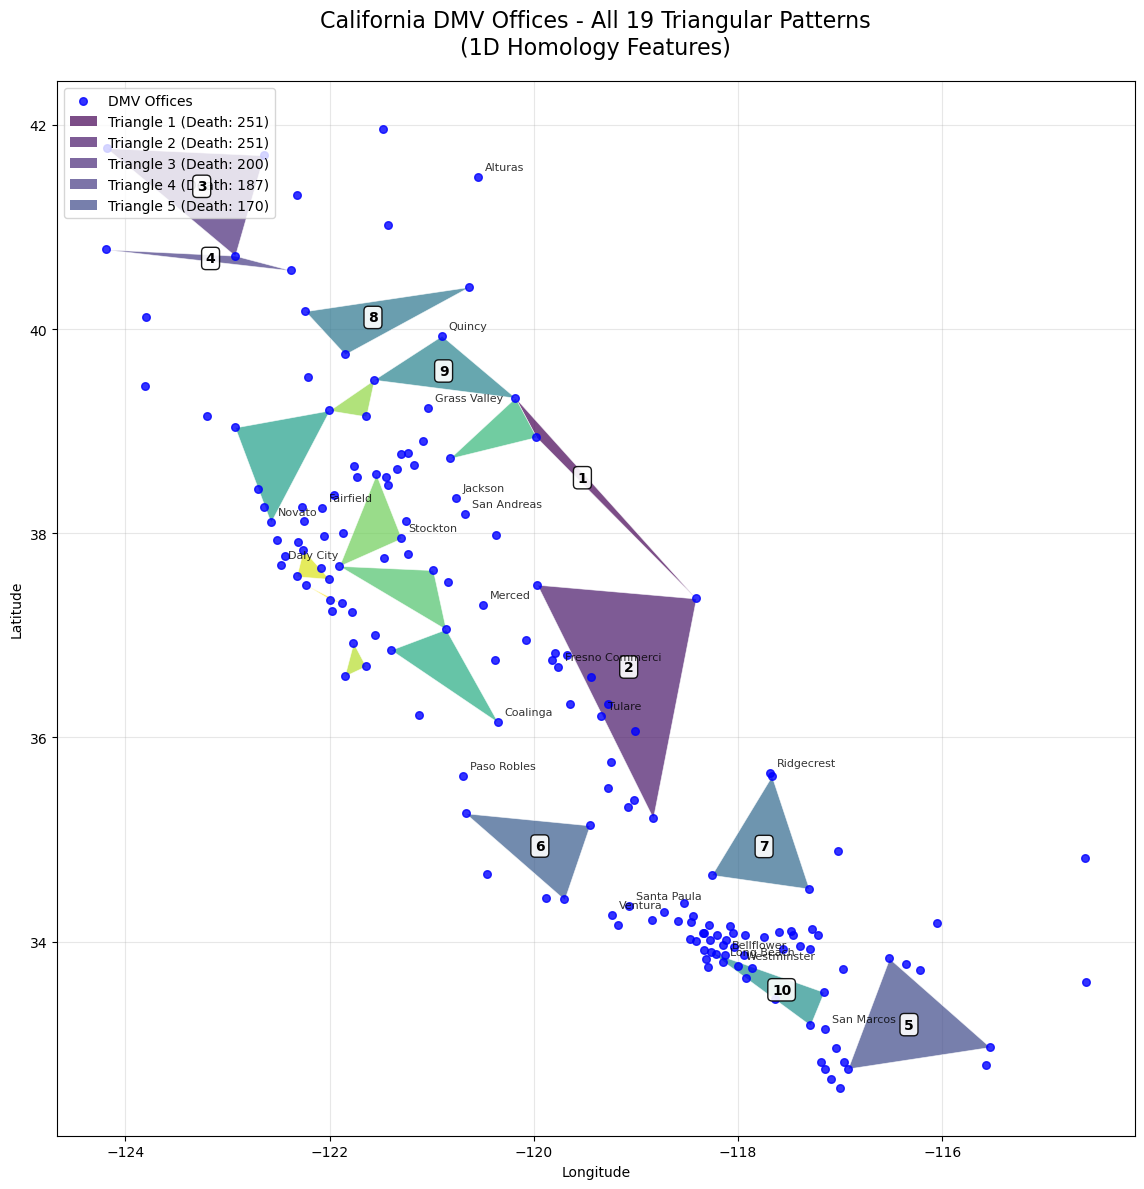


=== ALL TRIANGLE DETAILS ===
Total triangles found: 19
Death value range: 31.3 to 251.1

=== TOP 15 MOST PERSISTENT TRIANGLES ===
 1. Death: 4.19h, Avg Wait: 14.7min
    Offices: ['Truckee', 'South Lake Tahoe', 'Bishop']

 2. Death: 4.18h, Avg Wait: 16.0min
    Offices: ['Mariposa', 'Bishop', 'Arvin']

 3. Death: 3.33h, Avg Wait: 0.0min
    Offices: ['Yreka', 'Weaverville', 'Crescent City']

 4. Death: 3.12h, Avg Wait: 0.0min
    Offices: ['Weaverville', 'Redding', 'Eureka']

 5. Death: 2.83h, Avg Wait: 16.3min
    Offices: ['Rancho San Diego Industry Business Center', 'Palm Springs', 'Brawley']

 6. Death: 2.49h, Avg Wait: 10.7min
    Offices: ['Taft', 'Santa Barbara', 'San Luis Obispo']

 7. Death: 2.18h, Avg Wait: 16.3min
    Offices: ['Victorville', 'Lancaster', 'Lake Isabella']

 8. Death: 2.12h, Avg Wait: 0.0min
    Offices: ['Susanville', 'Red Bluff', 'Chico']

 9. Death: 1.95h, Avg Wait: 0.0min
    Offices: ['Truckee', 'Quincy', 'Oroville']

10. Death: 1.93h, Avg Wait: 20.3min

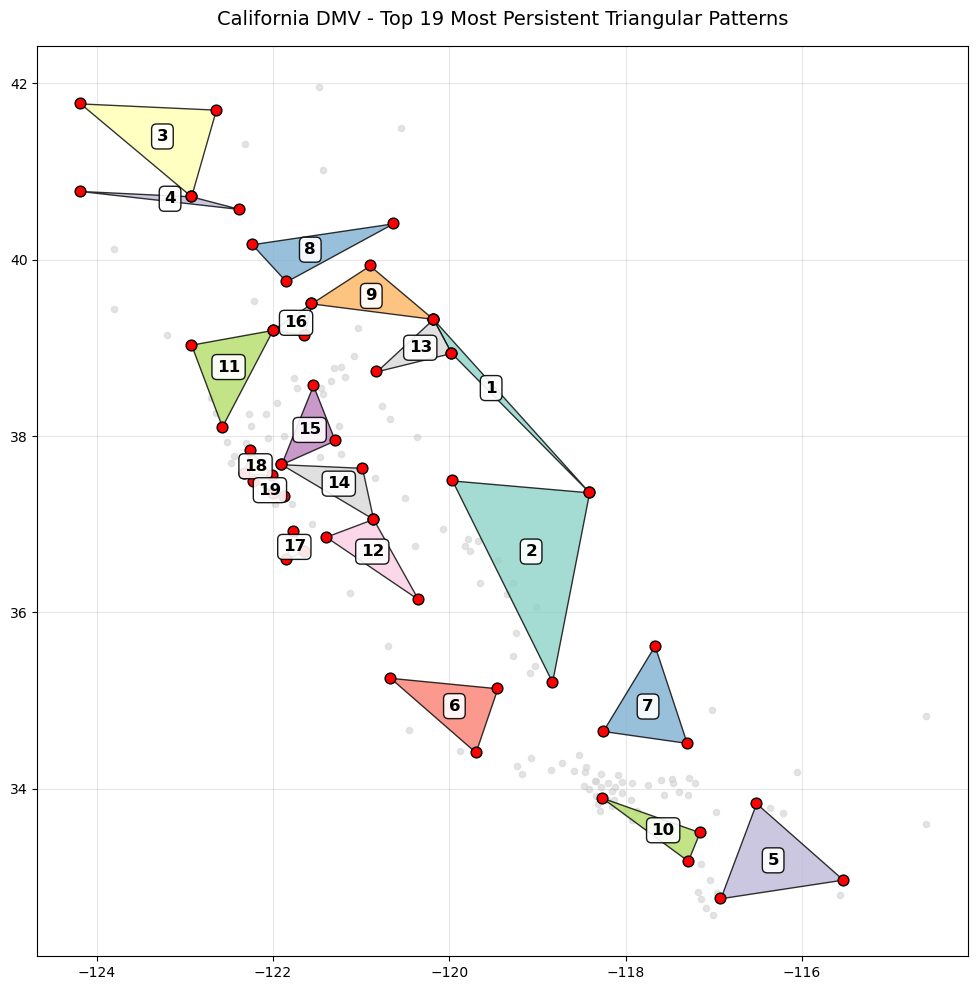


=== PLOTTING TOP 10 TRIANGLES (CLEANEST VIEW) ===
Plotting top 10 most persistent triangles...


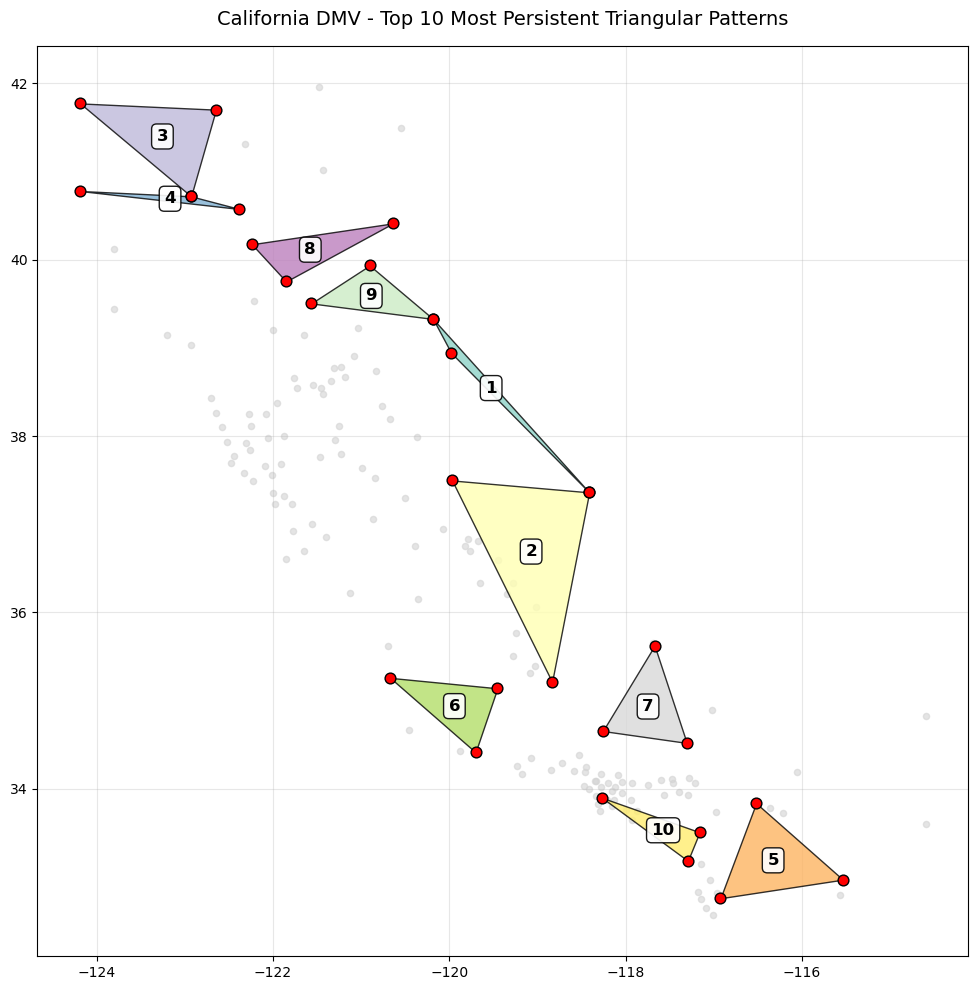

In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Polygon, Point
import matplotlib.lines as mlines

def plot_california_dmv_all_triangles():
    """
    Plot ALL 1D features (triangles) for California DMV offices
    Uses your existing TDA results: cpx, all_pairs, offices, dmv_df
    """
    
    print("Plotting ALL California DMV triangles...")
    
    # Create the main plot
    fig, ax = plt.subplots(1, 1, figsize=(15, 12))
    
    # First, get coordinates for DMV offices
    try:
        # Try to use lat/lon from your DMV dataframe
        if 'latitude' in dmv_df.columns and 'longitude' in dmv_df.columns:
            lats = dmv_df['latitude'].values[:len(offices)]
            lons = dmv_df['longitude'].values[:len(offices)]
            print("Using actual geographic coordinates")
            
            # Create Points for each DMV office
            office_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
            
        else:
            # Use MDS to create 2D layout from distance matrix
            print("No lat/lon found, creating layout from distance matrix...")
            from sklearn.manifold import MDS
            mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
            coords_2d = mds.fit_transform(D_matrix)
            lons = coords_2d[:, 0]
            lats = coords_2d[:, 1]
            
            # Create Points
            office_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
            
    except Exception as e:
        print(f"Error with coordinates: {e}")
        # Fallback: simple grid
        n = len(offices)
        grid_size = int(np.ceil(np.sqrt(n)))
        lons = [(i % grid_size) for i in range(n)]
        lats = [(i // grid_size) for i in range(n)]
        office_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
    
    # Create GeoDataFrame for DMV offices
    dmv_gdf = gpd.GeoDataFrame({
        'office_name': offices,
        'geometry': office_points
    })
    
    # Plot DMV office locations
    dmv_gdf.plot(ax=ax, markersize=30, color='blue', alpha=0.8, zorder=5, label='DMV Offices')
    
    # Get ALL 1D homology features (triangles)
    pairs_1d = [pair for pair in all_pairs if len(pair[1]) == 3]  # 1D features have 3 vertices
    
    if not pairs_1d:
        print("No 1D features (triangles) found!")
        return
    
    print(f"Found {len(pairs_1d)} triangular features")
    
    # Extract triangle data
    triangle_data = []
    for pair in pairs_1d:
        simplex = pair[1]
        death_val = cpx.filtration(simplex)
        triangle_data.append((simplex, death_val))
    
    # Sort by death value (most persistent first)
    triangle_data.sort(key=lambda x: x[1], reverse=True)
    
    # Create colors for all triangles
    colors = plt.cm.viridis(np.linspace(0, 1, len(triangle_data)))
    
    # Plot ALL triangles
    triangle_polygons = []
    for idx, (simplex, death_val) in enumerate(triangle_data):
        try:
            # Get the three office indices
            office_indices = list(simplex)
            
            if len(office_indices) == 3 and all(i < len(dmv_gdf) for i in office_indices):
                # Get the coordinates for the three offices
                triangle_points = [dmv_gdf.geometry.iloc[i] for i in office_indices]
                triangle_coords = [(point.x, point.y) for point in triangle_points]
                
                # Create triangle polygon
                triangle_polygon = Polygon(triangle_coords)
                triangle_polygons.append({
                    'geometry': triangle_polygon,
                    'death_val': death_val,
                    'rank': idx + 1,
                    'offices': [offices[i] for i in office_indices]
                })
                
                # Plot the triangle
                triangle_gdf = gpd.GeoDataFrame([{'geometry': triangle_polygon}])
                
                # Set transparency based on number of triangles
                alpha = 0.3 if len(triangle_data) > 100 else 0.5 if len(triangle_data) > 50 else 0.7
                
                triangle_gdf.plot(ax=ax, color=colors[idx], alpha=alpha, 
                                edgecolor='white', linewidth=0.5, zorder=2)
                
                # Add numbers for top 10 triangles
                if idx < 10:
                    centroid = triangle_polygon.centroid
                    ax.annotate(str(idx + 1), (centroid.x, centroid.y), 
                              fontsize=10, ha='center', va='center', weight='bold',
                              bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9),
                              zorder=6)
                              
        except Exception as e:
            print(f"Error plotting triangle {idx}: {e}")
            continue
    
    # Add office labels for a subset (to avoid clutter)
    label_step = max(1, len(offices) // 20)  # Show every nth office name
    for i in range(0, len(offices), label_step):
        point = dmv_gdf.geometry.iloc[i]
        ax.annotate(offices[i][:15], (point.x, point.y), 
                   xytext=(5, 5), textcoords='offset points', 
                   fontsize=8, alpha=0.8, zorder=7)
    
    # Styling
    ax.set_xlabel('Longitude' if 'latitude' in dmv_df.columns else 'X Coordinate')
    ax.set_ylabel('Latitude' if 'latitude' in dmv_df.columns else 'Y Coordinate')
    ax.set_title(f'California DMV Offices - All {len(triangle_data)} Triangular Patterns\n(1D Homology Features)', 
                fontsize=16, pad=20)
    
    # Create legend for top triangles
    legend_elements = [
        plt.scatter([], [], c='blue', s=30, alpha=0.8, label='DMV Offices')
    ]
    
    # Add legend for top 5 triangles
    for i in range(min(5, len(triangle_data))):
        legend_elements.append(
            plt.Rectangle((0,0), 1, 1, fc=colors[i], alpha=0.7, 
                         label=f'Triangle {i+1} (Death: {triangle_data[i][1]:.0f})')
        )
    
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(0, 1))
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed information about triangles
    print(f"\n=== ALL TRIANGLE DETAILS ===")
    print(f"Total triangles found: {len(triangle_data)}")
    print(f"Death value range: {triangle_data[-1][1]:.1f} to {triangle_data[0][1]:.1f}")
    
    print(f"\n=== TOP 15 MOST PERSISTENT TRIANGLES ===")
    for idx, (simplex, death_val) in enumerate(triangle_data[:15]):
        office_indices = list(simplex)
        office_names = [offices[i] for i in office_indices]
        avg_wait = np.mean([wait_times[i] for i in office_indices])
        print(f"{idx+1:2d}. Death: {death_val/60:.2f}h, Avg Wait: {avg_wait:.1f}min")
        print(f"    Offices: {office_names}")
        print()
    
    return triangle_polygons

# Alternative: Focused view showing only most persistent triangles
def plot_california_dmv_top_triangles(n_top=20):
    """
    Plot only the top N most persistent triangles for cleaner visualization
    """
    print(f"Plotting top {n_top} most persistent triangles...")
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    
    # Get coordinates (same logic as above)
    if 'latitude' in dmv_df.columns and 'longitude' in dmv_df.columns:
        lats = dmv_df['latitude'].values[:len(offices)]
        lons = dmv_df['longitude'].values[:len(offices)]
        office_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
    else:
        from sklearn.manifold import MDS
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
        coords_2d = mds.fit_transform(D_matrix)
        lons = coords_2d[:, 0]
        lats = coords_2d[:, 1]
        office_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
    
    dmv_gdf = gpd.GeoDataFrame({'office_name': offices, 'geometry': office_points})
    
    # Plot all offices as small points
    dmv_gdf.plot(ax=ax, markersize=20, color='lightgray', alpha=0.6, zorder=1)
    
    # Get top triangles
    pairs_1d = [pair for pair in all_pairs if len(pair[1]) == 3]
    triangle_data = [(pair[1], cpx.filtration(pair[1])) for pair in pairs_1d]
    triangle_data.sort(key=lambda x: x[1], reverse=True)
    triangle_data = triangle_data[:n_top]
    
    # Use distinct colors
    colors = plt.cm.Set3(np.linspace(0, 1, len(triangle_data)))
    
    for idx, (simplex, death_val) in enumerate(triangle_data):
        office_indices = list(simplex)
        
        if len(office_indices) == 3 and all(i < len(dmv_gdf) for i in office_indices):
            triangle_points = [dmv_gdf.geometry.iloc[i] for i in office_indices]
            triangle_coords = [(point.x, point.y) for point in triangle_points]
            triangle_polygon = Polygon(triangle_coords)
            
            triangle_gdf = gpd.GeoDataFrame([{'geometry': triangle_polygon}])
            triangle_gdf.plot(ax=ax, color=colors[idx], alpha=0.8, 
                            edgecolor='black', linewidth=1, zorder=3)
            
            # Highlight the offices in this triangle
            for i in office_indices:
                point = dmv_gdf.geometry.iloc[i]
                ax.scatter(point.x, point.y, c='red', s=60, zorder=4, 
                          edgecolors='black', linewidth=1)
            
            # Add triangle number
            centroid = triangle_polygon.centroid
            ax.annotate(str(idx + 1), (centroid.x, centroid.y), 
                       fontsize=12, ha='center', va='center', weight='bold',
                       bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9),
                       zorder=5)
    
    ax.set_title(f'California DMV - Top {len(triangle_data)} Most Persistent Triangular Patterns', 
                fontsize=14, pad=15)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Execute the visualizations
print("=== PLOTTING ALL CALIFORNIA DMV TRIANGLES ===")
all_triangles = plot_california_dmv_all_triangles()

print("\n=== PLOTTING TOP 20 TRIANGLES FOR CLARITY ===")
plot_california_dmv_top_triangles(n_top=20)

print("\n=== PLOTTING TOP 10 TRIANGLES (CLEANEST VIEW) ===")
plot_california_dmv_top_triangles(n_top=10)

=== CALIFORNIA DMV TOPOLOGICAL ANALYSIS ===
Attempting to download California state boundary...
✅ California state boundary added!
Using actual geographic coordinates
Found 19 finite 1D homology classes
Showing all 19 features
Could not download state boundaries


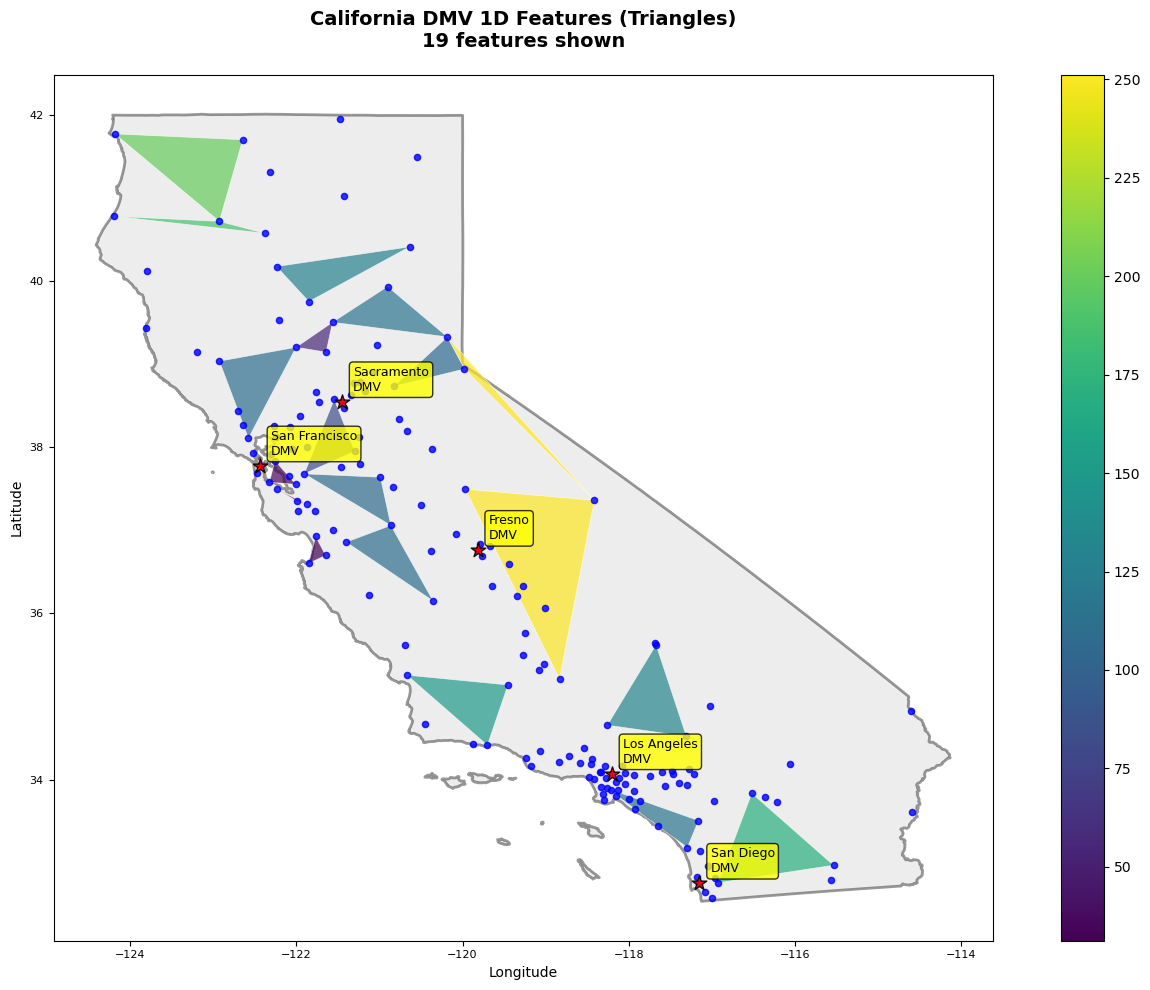

Using actual geographic coordinates
Found 19 finite 1D homology classes
After z-score filtering (>1): 3 features
Could not download state boundaries


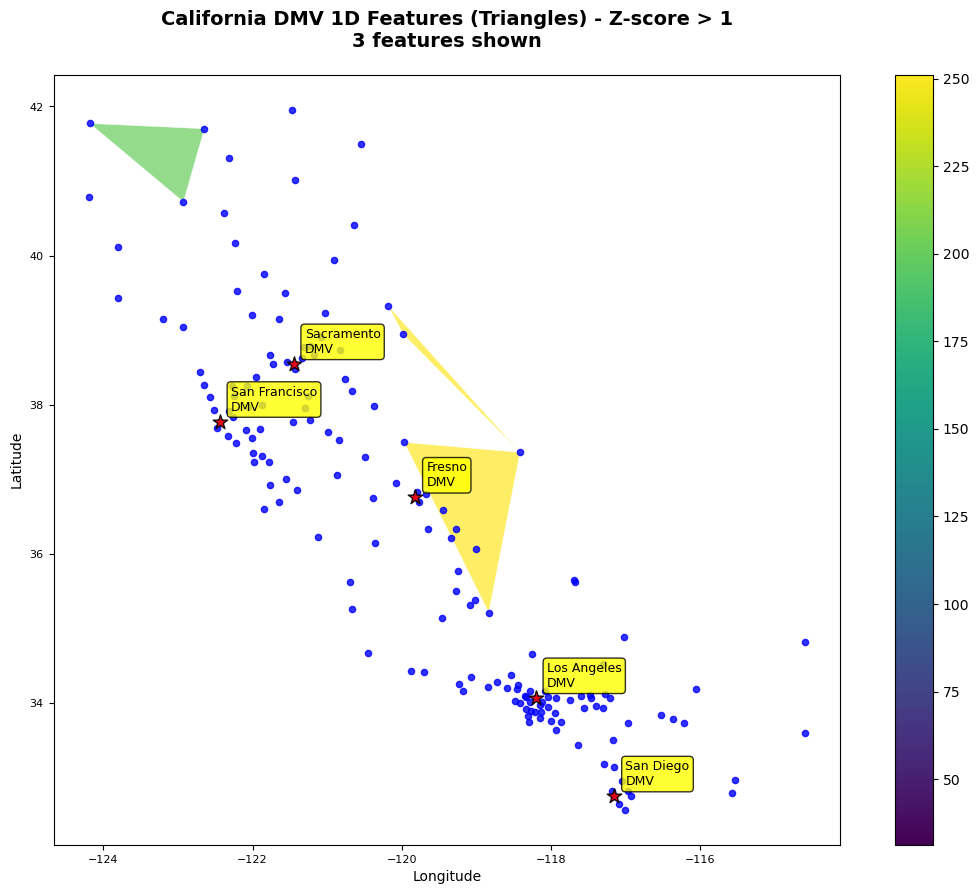

Using actual geographic coordinates
Found 129 finite 0D homology classes
Showing all 129 features
Could not download state boundaries


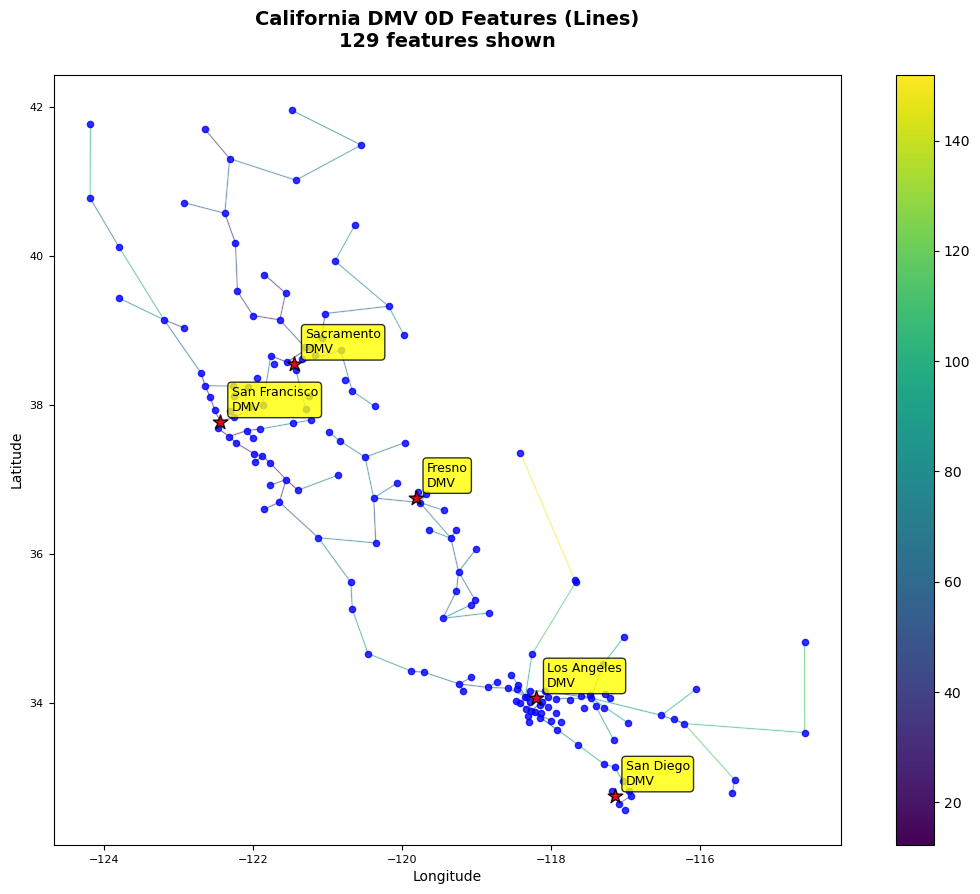

Using actual geographic coordinates
Found 129 finite 0D homology classes
After z-score filtering (>1): 19 features
Could not download state boundaries


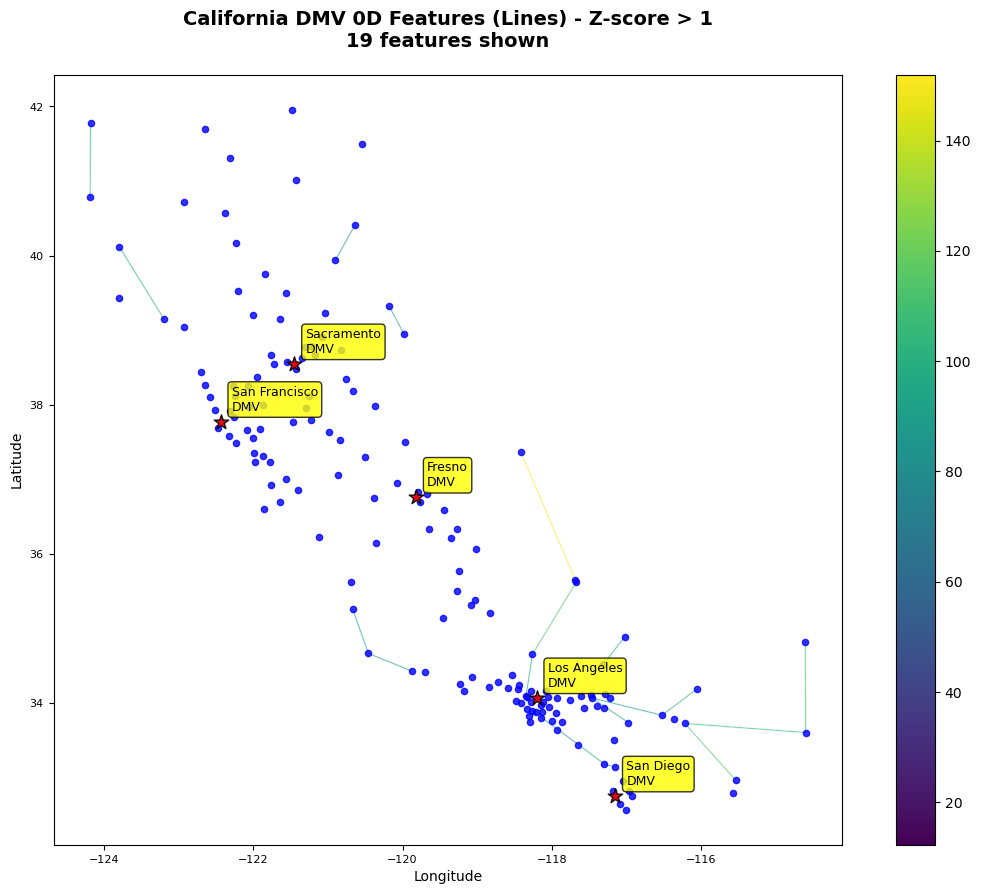

Using actual geographic coordinates
Found 129 finite 0D homology classes
After z-score filtering (>2): 4 features
Could not download state boundaries


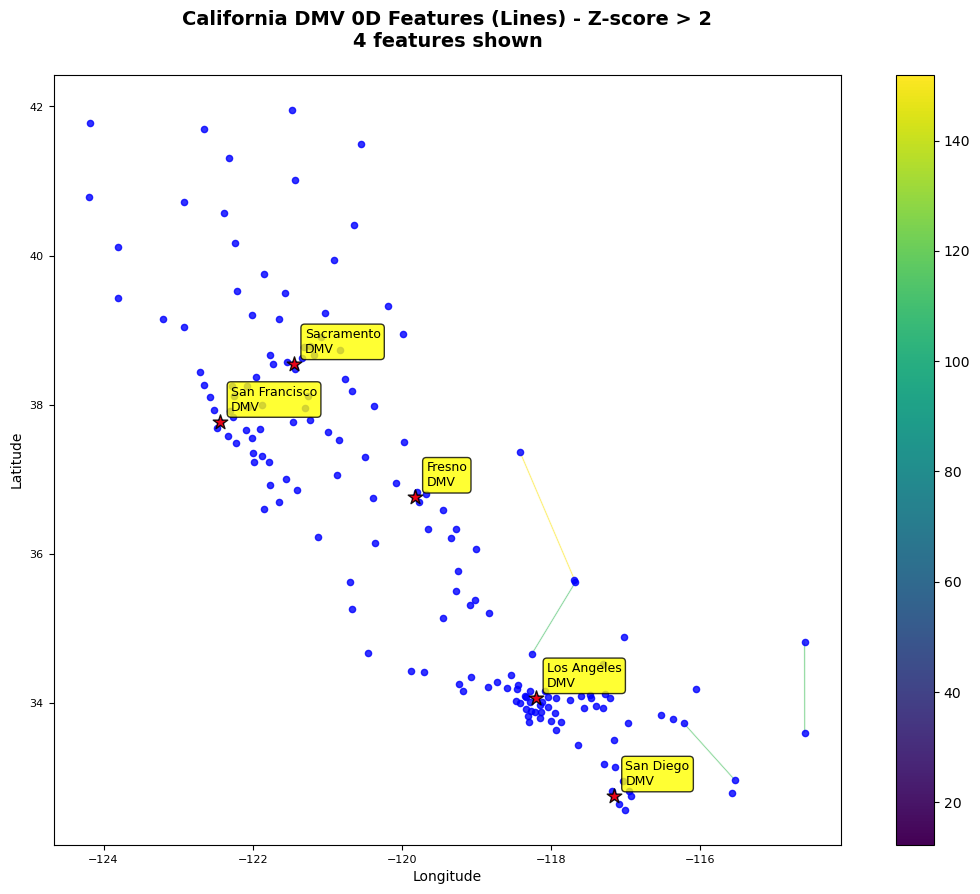

Using actual geographic coordinates
Found 19 finite 1D homology classes
Showing all 19 features
Could not download state boundaries


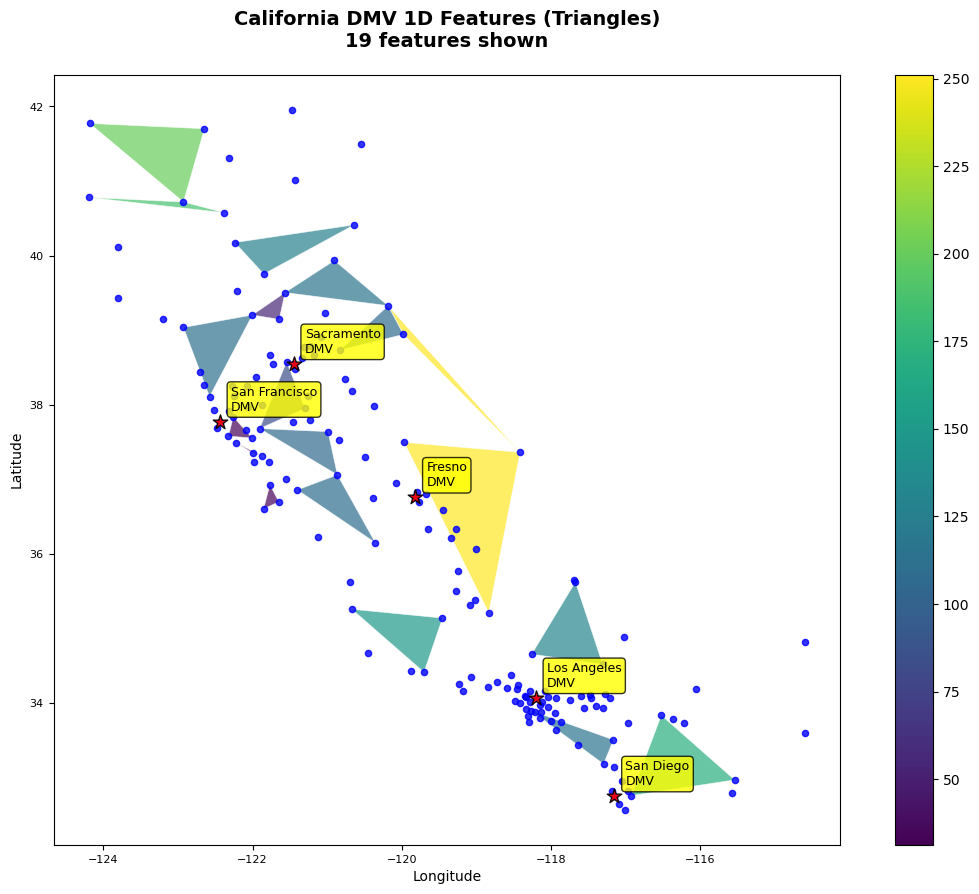

Using actual geographic coordinates
Found 19 finite 1D homology classes
After z-score filtering (>1): 3 features
Could not download state boundaries


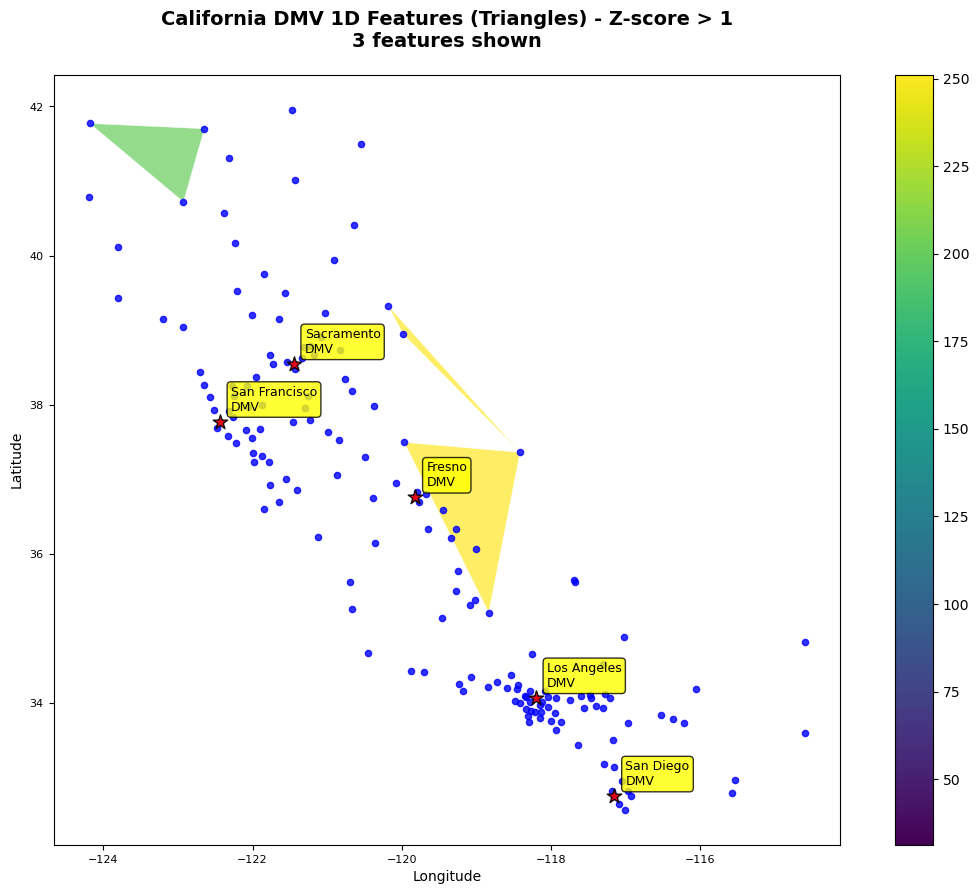

Using actual geographic coordinates
Found 19 finite 1D homology classes
After z-score filtering (>2): 0 features
Could not download state boundaries


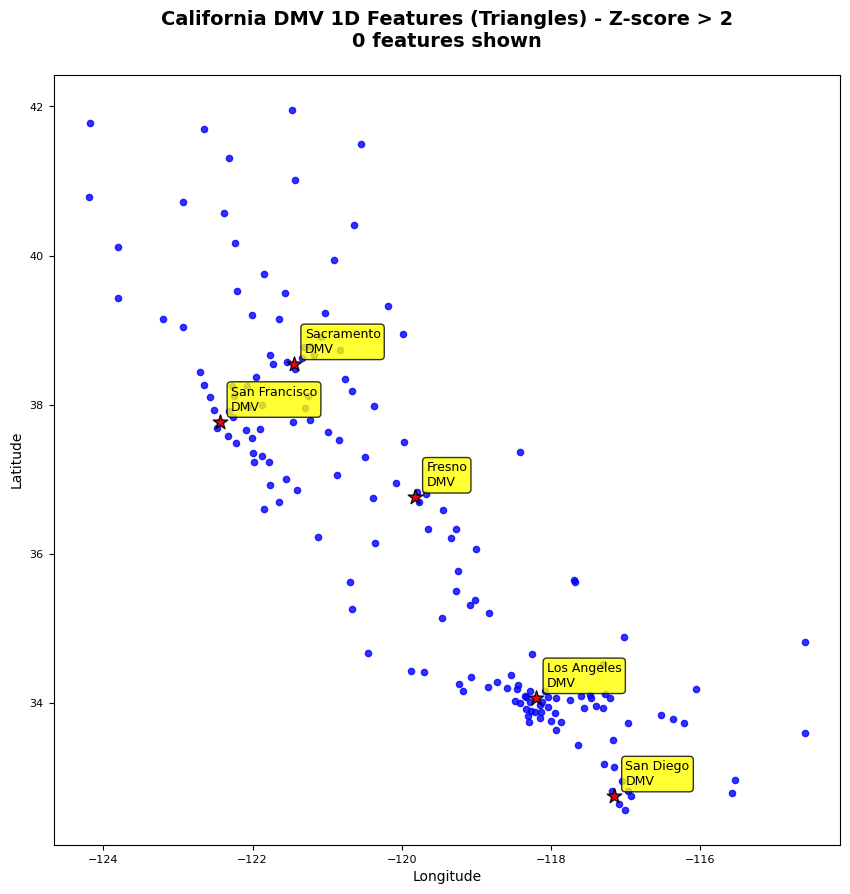


=== SUMMARY ===
Generated California DMV death simplices plots following your structure:
- 0D features: Lines connecting office pairs
- 1D features: Triangles connecting office triplets
- Color indicates death filtration value (persistence)


In [20]:
import numpy as np
import gudhi as gd
import geopandas as gpd
from shapely.geometry import LineString, Polygon, Point
import scipy.stats
import matplotlib.pyplot as plt

def plot_california_dmv_deathsimplices(cpx, all_pairs, hom_dim, ax, criteria='death', zscore_thresh=None, legend=False):
    '''
    Plot death simplices for California DMV offices (adapted from your plot_deathsimplices function)
    
    cpx: The filtered complex (your existing cpx)
    all_pairs: All (birth simplex, death simplex) pairs (your existing all_pairs) 
    hom_dim: {0, 1}. Homology dimension
    ax: matplotlib axis to plot on
    criteria: {'lifetime', 'death'}
    zscore_thresh: optional z-score threshold (if None, shows all)
    '''
    
    # Create DMV office points from your existing data
    try:
        # Try to use actual coordinates if available
        if 'latitude' in dmv_df.columns and 'longitude' in dmv_df.columns:
            lats = dmv_df['latitude'].values[:len(offices)]
            lons = dmv_df['longitude'].values[:len(offices)]
            print("Using actual geographic coordinates")
        else:
            # Use MDS to create 2D layout from distance matrix
            print("Creating layout from distance matrix...")
            from sklearn.manifold import MDS
            mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
            coords_2d = mds.fit_transform(D_matrix)
            lons = coords_2d[:, 0]
            lats = coords_2d[:, 1]
            
    except Exception as e:
        print(f"Error with coordinates: {e}")
        # Simple grid fallback
        n = len(offices)
        grid_size = int(np.ceil(np.sqrt(n)))
        lons = [(i % grid_size) for i in range(n)]
        lats = [(i // grid_size) for i in range(n)]
    
    # Create GeoDataFrame for DMV offices (equivalent to polls_df in your code)
    dmv_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
    polls_df = gpd.GeoDataFrame({
        'office_name': offices[:len(dmv_points)],
        'geometry': dmv_points
    })
    
    # Get simplex pairs for homology classes in dimension hom_dim
    # Only get finite homology classes (ones that have a death simplex)
    pairs = [pair for pair in all_pairs if len(pair[1]) == hom_dim + 2]
    
    if not pairs:
        print(f"No finite {hom_dim}D homology classes found!")
        return
    
    print(f"Found {len(pairs)} finite {hom_dim}D homology classes")
    
    # Calculate criteria, sort death simplices by criteria, calculate z-scores
    if criteria == "death":
        deathspx_criteria = [[pair[1], cpx.filtration(pair[1])] for pair in pairs]
    elif criteria == "lifetime":
        deathspx_criteria = [[pair[1], cpx.filtration(pair[1]) - cpx.filtration(pair[0])] for pair in pairs]
    
    deathspx_criteria.sort(key=lambda row: row[1], reverse=True)
    death_simplices = [item[0] for item in deathspx_criteria]
    criteria_vals = [item[1] for item in deathspx_criteria]
    
    # Calculate z-scores if we have multiple values
    if len(criteria_vals) > 1:
        zscores = scipy.stats.zscore(criteria_vals)
    else:
        zscores = [0] * len(criteria_vals)
    
    # Make geopandas dataframe where the polygons represent the death simplices
    death_geometries = []
    
    for deathspx in death_simplices:
        try:
            if hom_dim == 0:
                # 0D: Create buffered line between two points
                if len(deathspx) >= 2:
                    line_points = [polls_df.geometry.iloc[deathspx[j]] for j in range(2)]
                    line = LineString(line_points)
                    death_geometries.append(line.buffer(0.01))  # Adjust buffer size as needed
                else:
                    death_geometries.append(None)
                    
            elif hom_dim == 1:
                # 1D: Create triangle (polygon) from three points
                if len(deathspx) >= 3:
                    triangle_points = [polls_df.geometry.iloc[deathspx[j]] for j in range(3)]
                    triangle_coords = [(p.x, p.y) for p in triangle_points]
                    death_geometries.append(Polygon(triangle_coords))
                else:
                    death_geometries.append(None)
                    
        except Exception as e:
            print(f"Error creating geometry for simplex {deathspx}: {e}")
            death_geometries.append(None)
    
    # Filter out None geometries
    valid_indices = [i for i, geom in enumerate(death_geometries) if geom is not None]
    valid_geometries = [death_geometries[i] for i in valid_indices]
    valid_criteria = [criteria_vals[i] for i in valid_indices]
    valid_zscores = [zscores[i] for i in valid_indices]
    
    if not valid_geometries:
        print("No valid geometries created!")
        return
    
    # Create GeoDataFrame
    df_deathsimplices = gpd.GeoDataFrame({
        'geometry': valid_geometries,
        'criteria': valid_criteria,
        'zscore': valid_zscores
    })
    
    # Apply z-score filtering if requested
    if zscore_thresh is not None:
        df_deathsimplices_truncated = df_deathsimplices[df_deathsimplices['zscore'] > zscore_thresh]
        print(f"After z-score filtering (>{zscore_thresh}): {len(df_deathsimplices_truncated)} features")
    else:
        df_deathsimplices_truncated = df_deathsimplices
        print(f"Showing all {len(df_deathsimplices_truncated)} features")
    
    # Plot California state boundaries
    try:
        # Try to get California state shape using built-in data or online source
        try:
            # Option 1: Use geopandas built-in data (if available)
            import requests
            import io
            
            # Download California boundary from a reliable source
            print("Downloading California state boundary...")
            url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-states.geojson"
            response = requests.get(url)
            
            if response.status_code == 200:
                us_states = gpd.read_file(io.StringIO(response.text))
                ca_state = us_states[us_states['NAME'] == 'California']
                
                if not ca_state.empty:
                    ca_state.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2, alpha=0.3, zorder=1)
                    print("California state boundary added successfully!")
                else:
                    print("California not found in state data")
            else:
                print("Could not download state boundaries")
                
        except Exception as download_error:
            print(f"Download failed: {download_error}")
            
            # Fallback: Set California bounds and background
            if 'latitude' in dmv_df.columns:
                ca_bounds = {'minx': -124.5, 'maxx': -114.0, 'miny': 32.5, 'maxy': 42.0}
                ax.set_xlim(ca_bounds['minx'], ca_bounds['maxx'])
                ax.set_ylim(ca_bounds['miny'], ca_bounds['maxy'])
                ax.set_facecolor('lightblue')  # Ocean color
                ax.grid(True, alpha=0.2, zorder=1)
                print("Using coordinate bounds as fallback")
        
        # Add prominent DMV locations instead of major cities
        # These should be locations with many offices or important regional centers
        if 'latitude' in dmv_df.columns and len(dmv_df) > 0:
            # Find the largest DMV offices by wait times or prominence
            prominent_dmv_indices = []
            
            # Method 1: Find offices in major metropolitan areas
            major_metro_coords = {
                'Los Angeles Area': (-118.2437, 34.0522),
                'San Francisco Area': (-122.4194, 37.7749), 
                'San Diego Area': (-117.1611, 32.7157),
                'Sacramento Area': (-121.4686, 38.5816),
                'Fresno Area': (-119.7871, 36.7378)
            }
            
            # Find DMV offices closest to major metro areas
            for metro_name, (metro_lon, metro_lat) in major_metro_coords.items():
                min_distance = float('inf')
                closest_dmv_idx = None
                
                for i, office in enumerate(offices):
                    if i < len(lats) and i < len(lons):
                        # Calculate distance to metro area
                        distance = ((lons[i] - metro_lon)**2 + (lats[i] - metro_lat)**2)**0.5
                        if distance < min_distance:
                            min_distance = distance
                            closest_dmv_idx = i
                
                if closest_dmv_idx is not None and min_distance < 1.0:  # Within reasonable distance
                    prominent_dmv_indices.append((closest_dmv_idx, metro_name.replace(' Area', '')))
            
            # Plot prominent DMV locations
            for dmv_idx, area_name in prominent_dmv_indices:
                if dmv_idx < len(lons) and dmv_idx < len(lats):
                    ax.scatter(lons[dmv_idx], lats[dmv_idx], c='red', s=120, marker='*', 
                              zorder=6, edgecolors='black', linewidth=1, alpha=0.9)
                    ax.annotate(f'{area_name}\nDMV', (lons[dmv_idx], lats[dmv_idx]), 
                               xytext=(8, 8), textcoords='offset points', fontsize=9, 
                               bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.8),
                               zorder=7, ha='left')
            
    except Exception as e:
        print(f"Could not add CA boundaries: {e}")
        # Minimal fallback
        if 'latitude' in dmv_df.columns:
            ax.set_facecolor('lightblue')
    
    # Plot DMV office points (equivalent to polls_df.plot in your code)
    polls_df.plot(ax=ax, markersize=20, color='blue', alpha=0.8, zorder=5, label='DMV Offices')
    
    # Set color scale bounds
    if criteria_vals:
        vmin = min(criteria_vals)
        vmax = max(criteria_vals)
        
        # Plot the death simplices
        if len(df_deathsimplices_truncated) > 0:
            df_deathsimplices_truncated.plot('criteria', ax=ax, alpha=0.7, 
                                           vmin=vmin, vmax=vmax, legend=legend,
                                           cmap='viridis', edgecolor='white', linewidth=0.5)
    
    # Add title and labels with better formatting
    feature_type = "Lines" if hom_dim == 0 else "Triangles"
    title = f"California DMV {hom_dim}D Features ({feature_type})"
    if zscore_thresh is not None:
        title += f" - Z-score > {zscore_thresh}"
    title += f"\n{len(df_deathsimplices_truncated)} features shown"
    
    ax.set_title(title, fontsize=14, pad=20, weight='bold')
    
    # Keep axis on to show coordinates, but clean it up
    if 'latitude' in dmv_df.columns:
        ax.set_xlabel('Longitude', fontsize=10)
        ax.set_ylabel('Latitude', fontsize=10)
        ax.tick_params(labelsize=8)
    else:
        ax.set_axis_off()
    
    return df_deathsimplices

# Alternative method: Use a simpler approach to get California shape
def add_california_shape_simple(ax):
    """
    Add California state shape using a simple online source
    """
    try:
        # Use Natural Earth data for US states
        url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_1_states_provinces_lakes_shp.zip"
        
        # Or use US Census data
        census_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
        
        print("Attempting to download California state boundary...")
        
        import urllib.request
        import zipfile
        import tempfile
        import os
        
        # Download to temporary directory
        with tempfile.TemporaryDirectory() as temp_dir:
            zip_path = os.path.join(temp_dir, "states.zip")
            urllib.request.urlretrieve(census_url, zip_path)
            
            # Extract
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(temp_dir)
            
            # Find the shapefile
            shp_files = [f for f in os.listdir(temp_dir) if f.endswith('.shp')]
            if shp_files:
                states_gdf = gpd.read_file(os.path.join(temp_dir, shp_files[0]))
                ca_state = states_gdf[states_gdf['NAME'] == 'California']
                
                if not ca_state.empty:
                    ca_state.plot(ax=ax, color='lightgray', edgecolor='black', 
                                linewidth=2, alpha=0.4, zorder=1)
                    print("✅ California state boundary added!")
                    return True
                    
    except Exception as e:
        print(f"Could not download state shape: {e}")
        return False
    
    return False

# Enhanced usage with better California visualization
print("=== CALIFORNIA DMV TOPOLOGICAL ANALYSIS ===")

# Set up the plot 
plt.rcParams['figure.figsize'] = (14, 10)

# Create a comprehensive California DMV visualization
def plot_california_comprehensive():
    """
    Create the best possible California DMV visualization
    """
    fig, ax = plt.subplots(1, 1, figsize=(14, 10))
    
    # Try to add California state shape
    if not add_california_shape_simple(ax):
        # Fallback: set bounds and background
        if 'latitude' in dmv_df.columns:
            ca_bounds = {'minx': -124.5, 'maxx': -114.0, 'miny': 32.5, 'maxy': 42.0}
            ax.set_xlim(ca_bounds['minx'], ca_bounds['maxx'])
            ax.set_ylim(ca_bounds['miny'], ca_bounds['maxy'])
            ax.set_facecolor('lightblue')
            ax.grid(True, alpha=0.2)
    
    # Plot the triangular features
    df_triangles = plot_california_dmv_deathsimplices(cpx, all_pairs, hom_dim=1, ax=ax, 
                                                    criteria='death', zscore_thresh=None, legend=True)
    
    plt.tight_layout()
    plt.show()
    return df_triangles

# Run the comprehensive visualization
triangles_data = plot_california_comprehensive()

# With z-score filtering (like your original code)
fig, ax = plt.subplots(1, 1)
df_triangles_filtered = plot_california_dmv_deathsimplices(cpx, all_pairs, hom_dim=1, ax=ax, 
                                                         criteria='death', zscore_thresh=1, legend=True)
plt.show()

# Multiple plots like your loop structure
for hom_dim in [0, 1]:
    for zscore_thresh in [None, 1, 2]:
        fig, ax = plt.subplots(1, 1)
        plot_california_dmv_deathsimplices(cpx, all_pairs, hom_dim=hom_dim, ax=ax, 
                                         criteria='death', zscore_thresh=zscore_thresh, legend=True)
        
        # Save like your code
        thresh_str = "all" if zscore_thresh is None else f"zscore_{zscore_thresh}"
        plt.savefig(f'california_dmv_H_{hom_dim}_{thresh_str}_deathsimplices_by_death.jpeg', 
                   dpi=300, bbox_inches='tight')
        plt.show()

print("\n=== SUMMARY ===")
print("Generated California DMV death simplices plots following your structure:")
print("- 0D features: Lines connecting office pairs")  
print("- 1D features: Triangles connecting office triplets")
print("- Color indicates death filtration value (persistence)")

In [21]:
#We choose to only plot the 0D features that are above the mean line on the California map

=== FILTERING 0D FEATURES ===
Mean lifetime: 0.537 hours
Threshold (2x mean): 1.075 hours
Filtered 0D features: 22 out of 129 original


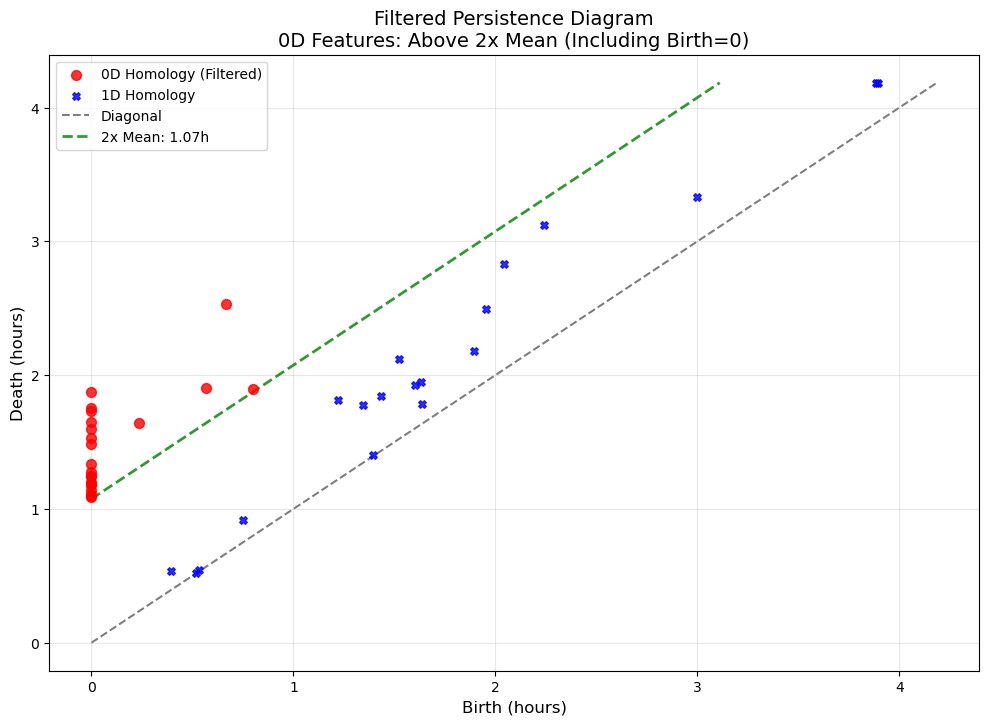


=== FILTERED 0D FEATURES STATISTICS ===
Count: 22
Lifetime range: 1.092 - 1.874 hours
Mean lifetime: 1.383 hours
Birth range: 0.000 - 0.800 hours
Features with birth = 0: 18
Features with birth > 0: 4

=== COMPARISON VIEW ===


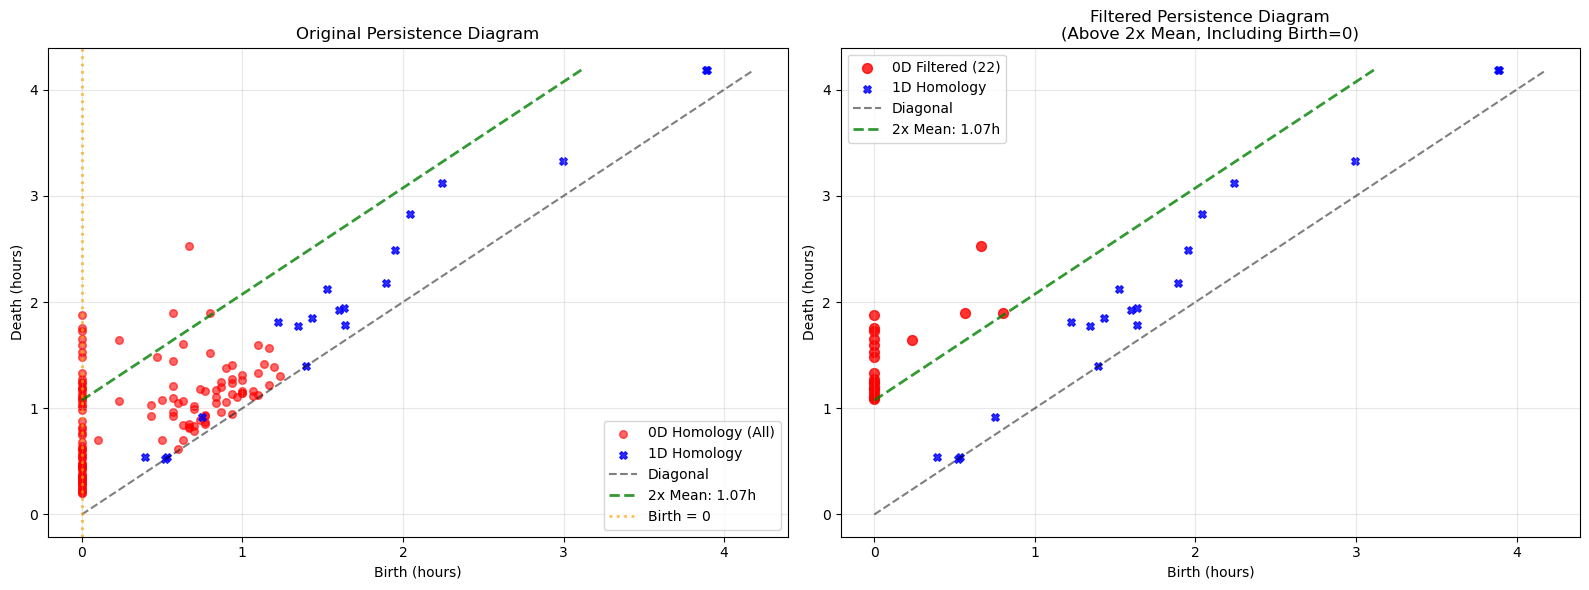

Original 0D features: 129
Filtered 0D features: 22
Features removed: 107


In [19]:
# Filter 0D features: above mean threshold and birth > 0
import matplotlib.pyplot as plt
import numpy as np

def plot_filtered_persistence_diagram():
    """
    Plot persistence diagram with filtered 0D features:
    - Only show 0D points above 2*mean lifetime threshold
    - INCLUDE points with birth = 0 (vertical line)
    """
    
    # Calculate mean lifetime threshold
    all_lifetimes = lifetimes_0d + lifetimes_1d
    mean_threshold = 2 * np.mean(all_lifetimes)  # Use 2x the mean
    
    print(f"Mean lifetime: {np.mean(all_lifetimes):.3f} hours")
    print(f"Threshold (2x mean): {mean_threshold:.3f} hours")
    
    # Filter 0D features
    filtered_births_0d = []
    filtered_deaths_0d = []
    
    for i in range(len(births_0d)):
        birth = births_0d[i]
        death = deaths_0d[i]
        lifetime = lifetimes_0d[i]
        
        # Keep if: lifetime >= 2*mean (INCLUDING birth = 0)
        if lifetime >= mean_threshold:
            filtered_births_0d.append(birth)
            filtered_deaths_0d.append(death)
    
    print(f"Filtered 0D features: {len(filtered_births_0d)} out of {len(births_0d)} original")
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot filtered 0D features (red points above 2*mean, including birth=0)
    if filtered_births_0d:
        plt.scatter(filtered_births_0d, filtered_deaths_0d, 
                   c='red', s=50, alpha=0.8, label='0D Homology (Filtered)', zorder=3)
    
    # Plot all 1D features (blue points)
    if births_1d:
        plt.scatter(births_1d, deaths_1d, 
                   c='blue', s=30, alpha=0.8, marker='X', label='1D Homology', zorder=3)
    
    # Add diagonal line
    if (filtered_births_0d + births_1d):
        max_val = max((filtered_deaths_0d if filtered_deaths_0d else [0]) + 
                     (deaths_1d if deaths_1d else [0]) + 
                     (filtered_births_0d if filtered_births_0d else [0]) + 
                     (births_1d if births_1d else [0]))
        plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Diagonal', zorder=1)
        
        # Add 2x mean threshold line
        plt.plot([0, max_val - mean_threshold], [mean_threshold, max_val], 
                 'g--', alpha=0.8, linewidth=2, label=f'2x Mean: {mean_threshold:.2f}h', zorder=2)
    
    plt.xlabel("Birth (hours)", fontsize=12)
    plt.ylabel("Death (hours)", fontsize=12)
    plt.title("Filtered Persistence Diagram\n0D Features: Above 2x Mean (Including Birth=0)", fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Print statistics about filtered features
    if filtered_births_0d:
        filtered_lifetimes = [filtered_deaths_0d[i] - filtered_births_0d[i] for i in range(len(filtered_births_0d))]
        print(f"\n=== FILTERED 0D FEATURES STATISTICS ===")
        print(f"Count: {len(filtered_lifetimes)}")
        print(f"Lifetime range: {min(filtered_lifetimes):.3f} - {max(filtered_lifetimes):.3f} hours")
        print(f"Mean lifetime: {np.mean(filtered_lifetimes):.3f} hours")
        print(f"Birth range: {min(filtered_births_0d):.3f} - {max(filtered_births_0d):.3f} hours")
        
        # Count how many are on the vertical line (birth = 0)
        vertical_count = sum(1 for birth in filtered_births_0d if birth == 0)
        print(f"Features with birth = 0: {vertical_count}")
        print(f"Features with birth > 0: {len(filtered_births_0d) - vertical_count}")
    
    return filtered_births_0d, filtered_deaths_0d

# Alternative: Show comparison between filtered and unfiltered
def plot_comparison_persistence_diagrams():
    """
    Show side-by-side comparison of original vs filtered persistence diagrams
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Calculate threshold
    all_lifetimes = lifetimes_0d + lifetimes_1d
    mean_threshold = 2 * np.mean(all_lifetimes)  # Use 2x mean
    
    # Left plot: Original (all features)
    if births_0d:
        ax1.scatter(births_0d, deaths_0d, c='red', s=30, alpha=0.6, label='0D Homology (All)')
    if births_1d:
        ax1.scatter(births_1d, deaths_1d, c='blue', s=30, alpha=0.8, marker='X', label='1D Homology')
    
    # Add threshold line to original
    if births_0d + births_1d:
        max_val = max(deaths_0d + deaths_1d + births_0d + births_1d)
        ax1.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='Diagonal')
        ax1.plot([0, max_val - mean_threshold], [mean_threshold, max_val], 
                'g--', alpha=0.8, linewidth=2, label=f'2x Mean: {mean_threshold:.2f}h')
        
        # Highlight the vertical line at birth=0
        ax1.axvline(x=0, color='orange', linestyle=':', linewidth=2, alpha=0.7, label='Birth = 0')
    
    ax1.set_xlabel("Birth (hours)")
    ax1.set_ylabel("Death (hours)")
    ax1.set_title("Original Persistence Diagram")
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Right plot: Filtered
    # Filter 0D features
    filtered_births_0d = []
    filtered_deaths_0d = []
    
    for i in range(len(births_0d)):
        birth = births_0d[i]
        death = deaths_0d[i]
        lifetime = lifetimes_0d[i]
        
        # Keep if: lifetime >= 2*mean (INCLUDING birth = 0)
        if lifetime >= mean_threshold:
            filtered_births_0d.append(birth)
            filtered_deaths_0d.append(death)
    
    # Plot filtered features
    if filtered_births_0d:
        ax2.scatter(filtered_births_0d, filtered_deaths_0d, 
                   c='red', s=50, alpha=0.8, label=f'0D Filtered ({len(filtered_births_0d)})')
    if births_1d:
        ax2.scatter(births_1d, deaths_1d, 
                   c='blue', s=30, alpha=0.8, marker='X', label='1D Homology')
    
    # Add lines to filtered plot
    if filtered_births_0d + births_1d:
        max_val_filtered = max((filtered_deaths_0d if filtered_deaths_0d else [0]) + 
                              (deaths_1d if deaths_1d else [0]) + 
                              (filtered_births_0d if filtered_births_0d else [0]) + 
                              (births_1d if births_1d else [0]))
        ax2.plot([0, max_val_filtered], [0, max_val_filtered], 'k--', alpha=0.5, label='Diagonal')
        ax2.plot([0, max_val_filtered - mean_threshold], [mean_threshold, max_val_filtered], 
                'g--', alpha=0.8, linewidth=2, label=f'2x Mean: {mean_threshold:.2f}h')
    
    ax2.set_xlabel("Birth (hours)")
    ax2.set_ylabel("Death (hours)")
    ax2.set_title("Filtered Persistence Diagram\n(Above 2x Mean, Including Birth=0)")
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Original 0D features: {len(births_0d)}")
    print(f"Filtered 0D features: {len(filtered_births_0d)}")
    print(f"Features removed: {len(births_0d) - len(filtered_births_0d)}")

# Run the filtering
print("=== FILTERING 0D FEATURES ===")
filtered_births, filtered_deaths = plot_filtered_persistence_diagram()

print("\n=== COMPARISON VIEW ===")
plot_comparison_persistence_diagrams()

=== CALIFORNIA DMV FILTERED 0D FEATURES MAP (2X MEAN THRESHOLD) ===
Using 167 DMV offices with actual coordinates
Adding California state boundary...
Trying US Census Bureau data...
✅ California state boundary added (Census Bureau)!
Found 129 total 0D features
Mean lifetime: 33.924 hours
Threshold (2x mean): 67.847 hours
Filtered to 18 features (from 129 total)
Filter criteria: lifetime >= 67.847 (INCLUDING birth = 0)
Features with birth = 0: 15
Features with birth > 0: 3
✅ Plotted 18 filtered 0D features
Criteria range: 68.7 to 152.0

=== CONNECTED DMV OFFICES ===
Total unique offices involved in connections: 31
Top 10 most connected DMV offices:
 1. Alturas: 2 connections
 2. Ukiah: 2 connections
 3. Quincy: 2 connections
 4. Blythe: 2 connections
 5. Lake Isabella: 2 connections
 6. Tulelake: 1 connections
 7. Woodland: 1 connections
 8. Pittsburg: 1 connections
 9. King City: 1 connections
10. Coalinga: 1 connections


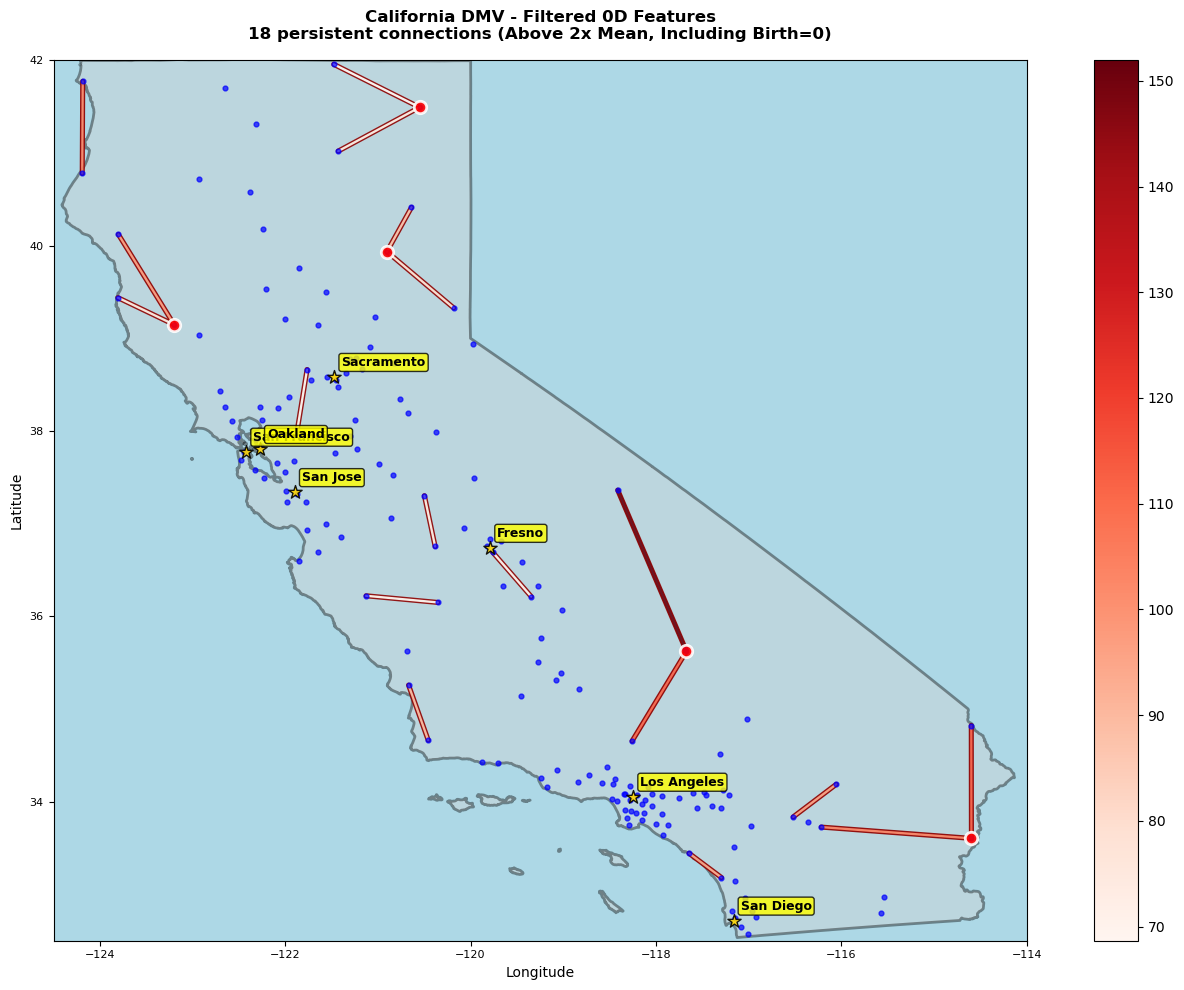


=== FILTERED 0D FEATURES ANALYSIS ===
Total filtered connections: 18
Criteria (death) range: 68.7 to 152.0
Mean criteria value: 91.7

=== TOP 10 MOST PERSISTENT CONNECTIONS (SPECIFIC OFFICES) ===
 1. Lake Isabella
    ↕
    Bishop
    Death filtration: 152.0
    Birth=40.000

 2. Needles
    ↕
    Blythe
    Death filtration: 114.1
    Birth=34.000

 3. Lancaster
    ↕
    Lake Isabella
    Death filtration: 112.4
    Birth=0 (Vertical)

 4. Indio
    ↕
    Blythe
    Death filtration: 105.3
    Birth=0 (Vertical)

 5. Eureka
    ↕
    Crescent City
    Death filtration: 103.9
    Birth=0 (Vertical)

 6. Ukiah
    ↕
    Garberville
    Death filtration: 99.1
    Birth=0 (Vertical)

 7. Twentynine Palms
    ↕
    Palm Springs
    Death filtration: 98.6
    Birth=14.000

 8. San Clemente
    ↕
    Oceanside
    Death filtration: 95.8
    Birth=0 (Vertical)

 9. San Luis Obispo
    ↕
    Lompoc
    Death filtration: 91.8
    Birth=0 (Vertical)

10. Susanville
    ↕
    Quincy
    Death f

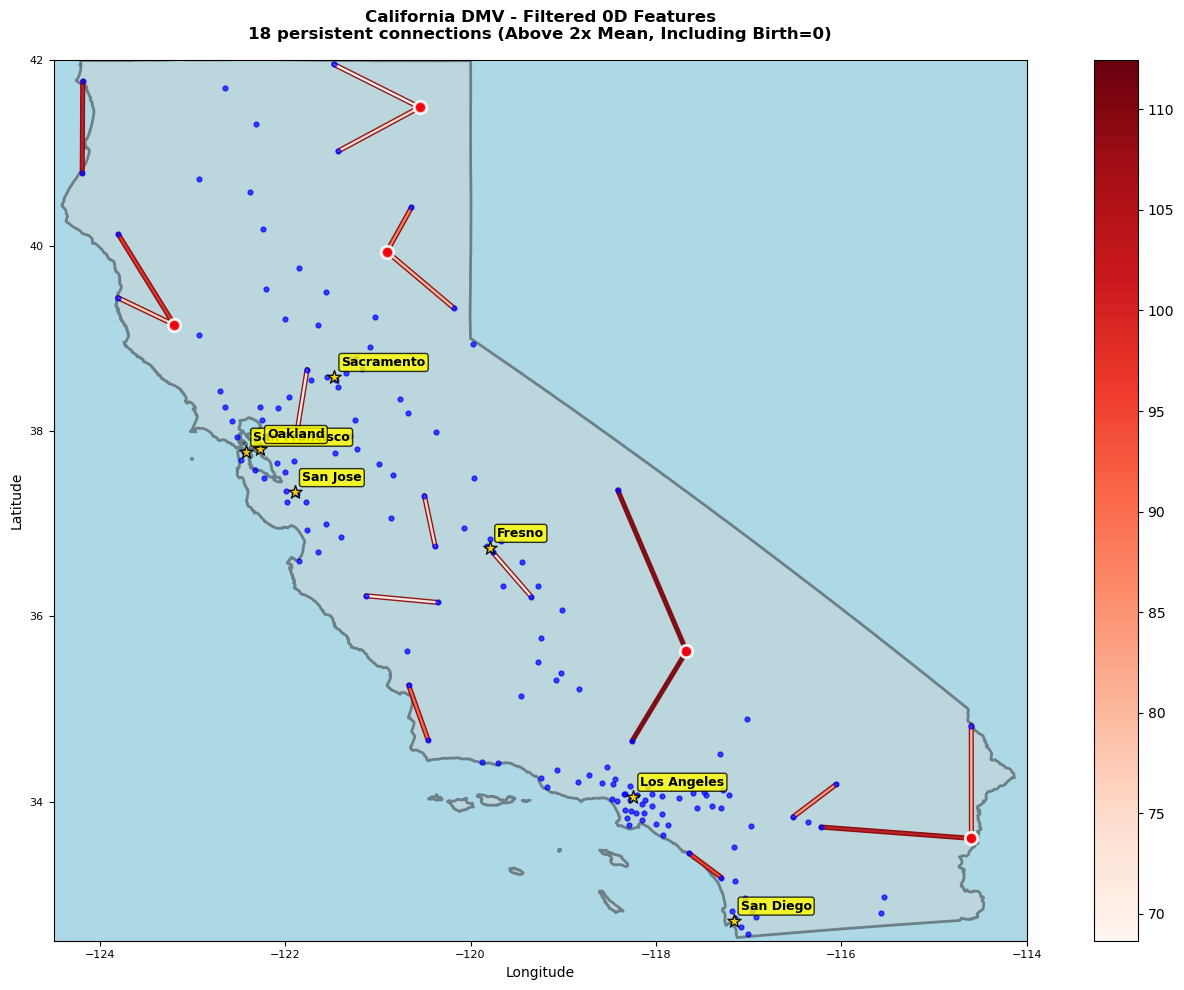

In [20]:
import numpy as np
import geopandas as gpd
from shapely.geometry import LineString, Point
import matplotlib.pyplot as plt
import scipy.stats

def plot_california_filtered_0d_features(cpx, all_pairs, ax, criteria='death', legend=False):
    '''
    Plot filtered 0D features on California map
    Shows only 0D features with lifetime >= 2*mean (INCLUDING birth = 0)
    '''
    
    # Use your actual DMV coordinates
    lats = dmv_df['latitude'].values
    lons = dmv_df['longitude'].values
    office_names = dmv_df['office_name'].values
    
    print(f"Using {len(office_names)} DMV offices with actual coordinates")
    
    # Create GeoDataFrame for DMV offices
    dmv_points = [Point(lon, lat) for lon, lat in zip(lons, lats)]
    polls_df = gpd.GeoDataFrame({
        'office_name': office_names,
        'geometry': dmv_points
    })
    
    # Add California state boundaries
    try:
        print("Adding California state boundary...")
        import requests
        import io
        import urllib.request
        import zipfile
        import tempfile
        import os
        
        # Method 1: Try online GeoJSON
        try:
            url = "https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-states.geojson"
            response = requests.get(url)
            
            if response.status_code == 200:
                us_states = gpd.read_file(io.StringIO(response.text))
                ca_state = us_states[us_states['NAME'] == 'California']
                
                if not ca_state.empty:
                    ca_state.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2, alpha=0.4, zorder=1)
                    print("✅ California state boundary added (GeoJSON)!")
                else:
                    raise Exception("California not found in GeoJSON")
            else:
                raise Exception("Could not download GeoJSON")
                
        except:
            # Method 2: Try US Census Bureau shapefile
            print("Trying US Census Bureau data...")
            
            census_url = "https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip"
            
            with tempfile.TemporaryDirectory() as temp_dir:
                zip_path = os.path.join(temp_dir, "states.zip")
                urllib.request.urlretrieve(census_url, zip_path)
                
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(temp_dir)
                
                shp_files = [f for f in os.listdir(temp_dir) if f.endswith('.shp')]
                if shp_files:
                    states_gdf = gpd.read_file(os.path.join(temp_dir, shp_files[0]))
                    ca_state = states_gdf[states_gdf['NAME'] == 'California']
                    
                    if not ca_state.empty:
                        ca_state.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2, alpha=0.4, zorder=1)
                        print("✅ California state boundary added (Census Bureau)!")
                    else:
                        raise Exception("California not found in Census data")
        
        # Set California bounds
        ca_bounds = {'minx': -124.5, 'maxx': -114.0, 'miny': 32.5, 'maxy': 42.0}
        ax.set_xlim(ca_bounds['minx'], ca_bounds['maxx'])
        ax.set_ylim(ca_bounds['miny'], ca_bounds['maxy'])
        ax.set_facecolor('lightblue')  # Ocean background
                
    except Exception as e:
        print(f"Could not add CA boundaries: {e}")
        # Fallback: Just set bounds and background
        ca_bounds = {'minx': -124.5, 'maxx': -114.0, 'miny': 32.5, 'maxy': 42.0}
        ax.set_xlim(ca_bounds['minx'], ca_bounds['maxx'])
        ax.set_ylim(ca_bounds['miny'], ca_bounds['maxy'])
        ax.set_facecolor('lightblue')
    
    # Get 0D homology pairs (edges between two offices)
    pairs_0d = [pair for pair in all_pairs if len(pair[1]) == 2]  # 0D features = 2 vertices
    
    if not pairs_0d:
        print("No 0D features found!")
        return None
    
    print(f"Found {len(pairs_0d)} total 0D features")
    
    # Calculate lifetimes and birth values for all 0D features
    feature_data = []
    for pair in pairs_0d:
        birth_simplex, death_simplex = pair
        birth_val = cpx.filtration(birth_simplex)
        death_val = cpx.filtration(death_simplex)
        lifetime = death_val - birth_val
        
        if criteria == "death":
            criteria_val = death_val
        elif criteria == "lifetime":
            criteria_val = lifetime
        
        feature_data.append({
            'birth_simplex': birth_simplex,
            'death_simplex': death_simplex,
            'birth': birth_val,
            'death': death_val,
            'lifetime': lifetime,
            'criteria': criteria_val
        })
    
    # Calculate 2x mean lifetime threshold
    all_lifetimes = [f['lifetime'] for f in feature_data]
    mean_lifetime = np.mean(all_lifetimes)
    threshold = 2 * mean_lifetime  # Use 2x the mean
    
    print(f"Mean lifetime: {mean_lifetime:.3f} hours")
    print(f"Threshold (2x mean): {threshold:.3f} hours")
    
    # Filter features: lifetime >= 2*mean (INCLUDING birth = 0)
    filtered_features = []
    for f in feature_data:
        if f['lifetime'] >= threshold:  # Removed birth > 0 condition
            filtered_features.append(f)
    
    print(f"Filtered to {len(filtered_features)} features (from {len(feature_data)} total)")
    print(f"Filter criteria: lifetime >= {threshold:.3f} (INCLUDING birth = 0)")
    
    # Count birth = 0 vs birth > 0
    birth_zero_count = sum(1 for f in filtered_features if f['birth'] == 0)
    birth_positive_count = len(filtered_features) - birth_zero_count
    print(f"Features with birth = 0: {birth_zero_count}")
    print(f"Features with birth > 0: {birth_positive_count}")
    
    # Create geometries for filtered features
    filtered_geometries = []
    filtered_criteria_vals = []
    filtered_office_pairs = []
    
    for f in filtered_features:
        death_simplex = f['death_simplex']
        criteria_val = f['criteria']
        birth_val = f['birth']
        
        try:
            if len(death_simplex) >= 2:
                # Get the two office indices
                office_idx1, office_idx2 = death_simplex[0], death_simplex[1]
                
                # Create line between the two DMV offices
                point1 = polls_df.geometry.iloc[office_idx1]
                point2 = polls_df.geometry.iloc[office_idx2]
                line = LineString([point1, point2])
                buffered_line = line.buffer(0.02)  # Buffer for visibility on map
                
                filtered_geometries.append(buffered_line)
                filtered_criteria_vals.append(criteria_val)
                
                # Store office pair info for analysis
                office1_name = office_names[office_idx1]
                office2_name = office_names[office_idx2]
                filtered_office_pairs.append((office1_name, office2_name, criteria_val, birth_val))
                
        except Exception as e:
            print(f"Error creating geometry for simplex {death_simplex}: {e}")
    
    if not filtered_geometries:
        print("No valid filtered geometries created!")
        return None
    
    # Create GeoDataFrame for filtered features
    df_filtered_0d = gpd.GeoDataFrame({
        'geometry': filtered_geometries,
        'criteria': filtered_criteria_vals
    })
    
    # Plot DMV office points
    polls_df.plot(ax=ax, markersize=12, color='blue', alpha=0.7, zorder=4, label='DMV Offices')
    
    # Plot filtered 0D features (connections between office pairs)
    vmin = min(filtered_criteria_vals)
    vmax = max(filtered_criteria_vals)
    
    df_filtered_0d.plot('criteria', ax=ax, alpha=0.9, 
                       vmin=vmin, vmax=vmax, legend=legend,
                       cmap='Reds', edgecolor='darkred', linewidth=1, zorder=3)
    
    print(f"✅ Plotted {len(df_filtered_0d)} filtered 0D features")
    print(f"Criteria range: {vmin:.1f} to {vmax:.1f}")
    
    # Add major California cities with better styling
    major_cities = {
        'Los Angeles': (-118.2437, 34.0522),
        'San Francisco': (-122.4194, 37.7749), 
        'San Diego': (-117.1611, 32.7157),
        'Sacramento': (-121.4686, 38.5816),
        'Fresno': (-119.7871, 36.7378),
        'San Jose': (-121.8943, 37.3387),
        'Oakland': (-122.2711, 37.8044)
    }
    
    for city_name, (lon, lat) in major_cities.items():
        ax.scatter(lon, lat, c='gold', s=100, marker='*', zorder=6, 
                  edgecolors='black', linewidth=1, alpha=0.9)
        
        # Simplified city labels - smaller and better positioned
        ax.annotate(city_name, (lon, lat), xytext=(5, 8), 
                   textcoords='offset points', fontsize=9, weight='bold',
                   bbox=dict(boxstyle="round,pad=0.2", facecolor='yellow', alpha=0.8),
                   zorder=7)
    
    # Highlight the connected DMV offices (no labels to avoid clutter)
    connected_offices = set()
    for office1, office2, _, _ in filtered_office_pairs:
        connected_offices.add(office1)
        connected_offices.add(office2)
    
    print(f"\n=== CONNECTED DMV OFFICES ===")
    print(f"Total unique offices involved in connections: {len(connected_offices)}")
    
    # Find and highlight the most connected DMV offices
    office_connection_count = {}
    for office1, office2, _, _ in filtered_office_pairs:
        office_connection_count[office1] = office_connection_count.get(office1, 0) + 1
        office_connection_count[office2] = office_connection_count.get(office2, 0) + 1
    
    # Sort offices by number of connections
    sorted_offices = sorted(office_connection_count.items(), key=lambda x: x[1], reverse=True)
    
    print("Top 10 most connected DMV offices:")
    for i, (office_name, connection_count) in enumerate(sorted_offices[:10]):
        print(f"{i+1:2d}. {office_name}: {connection_count} connections")
        
        # Find this office's coordinates and highlight it (no labels)
        try:
            office_idx = list(office_names).index(office_name)
            office_lat = lats[office_idx]
            office_lon = lons[office_idx]
            
            # Highlight top 5 most connected offices with larger markers (no labels)
            if i < 5:
                ax.scatter(office_lon, office_lat, c='red', s=80, marker='o', 
                          zorder=8, edgecolors='white', linewidth=2, alpha=0.9)
        except ValueError:
            continue
    
    # Styling
    ax.set_xlabel('Longitude', fontsize=10)
    ax.set_ylabel('Latitude', fontsize=10)
    ax.tick_params(labelsize=8)
    
    feature_count = len(df_filtered_0d)
    title = f"California DMV - Filtered 0D Features\n{feature_count} persistent connections (Above 2x Mean, Including Birth=0)"
    ax.set_title(title, fontsize=12, pad=15, weight='bold')
    
    return df_filtered_0d, filtered_office_pairs

# Main execution
print("=== CALIFORNIA DMV FILTERED 0D FEATURES MAP (2X MEAN THRESHOLD) ===")

# Set up the plot
plt.rcParams['figure.figsize'] = (14, 10)

# Create the filtered 0D features map
fig, ax = plt.subplots(1, 1)
result = plot_california_filtered_0d_features(cpx, all_pairs, ax=ax, criteria='death', legend=True)

if result is not None:
    df_filtered, office_pairs = result
    
    plt.tight_layout()
    plt.show()
    
    # Analysis of the filtered connections
    print(f"\n=== FILTERED 0D FEATURES ANALYSIS ===")
    print(f"Total filtered connections: {len(df_filtered)}")
    print(f"Criteria (death) range: {df_filtered['criteria'].min():.1f} to {df_filtered['criteria'].max():.1f}")
    print(f"Mean criteria value: {df_filtered['criteria'].mean():.1f}")
    
    # Show the most persistent connections with specific office names
    print(f"\n=== TOP 10 MOST PERSISTENT CONNECTIONS (SPECIFIC OFFICES) ===")
    sorted_pairs = sorted(office_pairs, key=lambda x: x[2], reverse=True)
    for i, (office1, office2, criteria_val, birth_val) in enumerate(sorted_pairs[:10]):
        birth_status = "Birth=0 (Vertical)" if birth_val == 0 else f"Birth={birth_val:.3f}"
        print(f"{i+1:2d}. {office1}")
        print(f"    ↕")  
        print(f"    {office2}")
        print(f"    Death filtration: {criteria_val:.1f}")
        print(f"    {birth_status}")
        
        # Add connection details
        try:
            idx1 = list(office_names).index(office1)
            idx2 = list(office_names).index(office2)
            
            # Calculate geographic distance
            lat1, lon1 = lats[idx1], lons[idx1]
            lat2, lon2 = lats[idx2], lons[idx2]
            
            # Simple distance calculation (not exact but gives idea)
            geo_distance = ((lat2-lat1)**2 + (lon2-lon1)**2)**0.5 * 111  # rough km conversion
            
            print(f"    Geographic distance: ~{geo_distance:.1f} km")
            print(f"    Wait times: {dmv_df.iloc[idx1]['appointment_wait_minutes']} min ↔ {dmv_df.iloc[idx2]['appointment_wait_minutes']} min")
        except:
            pass
        print()
    
    print("=== INTERPRETATION ===")
    print("Red lines show persistent connections between DMV office pairs that:")
    print("1. Have lifetimes above 2x the mean threshold")
    print("2. Include both birth=0 (early connections) and birth>0 (later connections)")
    print("3. Represent the most significant geographic and service-quality relationships")
    print("4. Darker red = higher death filtration = more persistent connections")
    
else:
    print("❌ No filtered features to display")

# Optional: Also create a version with lifetime criteria
print("\n" + "="*50)
print("=== ALTERNATIVE: USING LIFETIME CRITERIA ===")

fig, ax = plt.subplots(1, 1)
result_lifetime = plot_california_filtered_0d_features(cpx, all_pairs, ax=ax, criteria='lifetime', legend=True)
if result_lifetime is not None:
    plt.tight_layout()
    plt.show()

In [1]:
#Below is Chi-square analysis

In [2]:
import pandas as pd

In [3]:
#join dmv_persistence_val with ddmv_df = pd.read_csv('dmv_offices_details.csv')

In [4]:
dmv_df

NameError: name 'dmv_df' is not defined

In [22]:
race_df = pd.read_csv('california_race_with_other_and_hispanic.csv')

In [23]:
race_df

,ZIP,Total,Two or More Races,White,Black or African American,American Indian and Alaska Native,Asian,Native Hawaiian and Other Pacific Islander,Hispanic,Other Race
0,90001.0,56403.0,16438.0,10954.0,4183.0,1481.0,306.0,38.0,51456.0,23003.0
1,90002.0,52735.0,12048.0,8167.0,8154.0,1609.0,894.0,17.0,43219.0,21846.0
2,90003.0,71708.0,14175.0,9242.0,12009.0,771.0,265.0,0.0,58066.0,35246.0
3,90004.0,58844.0,6309.0,16227.0,2668.0,800.0,14836.0,51.0,27055.0,17953.0
4,90005.0,38747.0,5642.0,7181.0,2150.0,676.0,12624.0,9.0,18498.0,10465.0
...,...,...,...,...,...,...,...,...,...,...
1799,96150.0,29527.0,3208.0,21331.0,159.0,293.0,1642.0,57.0,7025.0,2837.0
1800,96155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1801,96161.0,19231.0,2076.0,16200.0,52.0,0.0,435.0,49.0,2360.0,419.0
1802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# FIX CHI-SQUARE TEST - HANDLE ZERO VALUES

print("=== DEBUGGING AND FIXING CHI-SQUARE TEST ===")

# Step 1: Check for the intersecting_zipcodes issue
if 'intersecting_zipcodes' not in locals():
    print("❌ intersecting_zipcodes not found. Running triangle analysis first...")
    
    # You need to run this first:
    print("Please run:")
    print("results = run_triangle_demographic_analysis(cpx, all_pairs, dmv_df, race_df)")
    print("intersecting_zipcodes = results['intersecting_zipcodes']")
    exit()

# Step 2: Add underserved column
print("1. ADDING UNDERSERVED CLASSIFICATION:")
race_df['underserved'] = race_df['ZIP'].astype(str).isin(intersecting_zipcodes)

print(f"   Total zip codes: {len(race_df)}")
print(f"   Underserved zip codes: {race_df['underserved'].sum()}")
print(f"   Non-underserved zip codes: {(~race_df['underserved']).sum()}")

# Step 3: Check for zero population issues
print(f"\n2. CHECKING FOR ZERO POPULATION ISSUES:")

racial_columns = [
    'White',
    'Black or African American', 
    'American Indian and Alaska Native',
    'Asian',
    'Native Hawaiian and Other Pacific Islander',
    'Hispanic',
    'Other Race',
    'Two or More Races'
]

# Check which columns exist
available_columns = [col for col in racial_columns if col in race_df.columns]
print(f"   Available columns: {available_columns}")

# Check for zero values in each category
print(f"\n3. POPULATION BY CATEGORY AND REGION:")
for col in available_columns:
    underserved_pop = race_df[race_df['underserved']][col].sum()
    not_underserved_pop = race_df[~race_df['underserved']][col].sum()
    
    print(f"   {col}:")
    print(f"     Underserved: {underserved_pop:,}")
    print(f"     Not underserved: {not_underserved_pop:,}")
    
    if underserved_pop == 0 or not_underserved_pop == 0:
        print(f"     ⚠️ ZERO VALUE DETECTED - will cause chi-square error")

# Step 4: Create contingency table and filter out problematic columns
print(f"\n4. CREATING FILTERED CONTINGENCY TABLE:")

contingency_data = []
region_labels = ['Not Underserved', 'Underserved']

for underserved_status in [False, True]:
    region_data = race_df[race_df['underserved'] == underserved_status]
    race_totals = [region_data[col].sum() for col in available_columns]
    contingency_data.append(race_totals)

# Create initial contingency table
contingency_df = pd.DataFrame(
    contingency_data,
    index=region_labels,
    columns=available_columns
)

print("Initial contingency table:")
print(contingency_df.to_string(formatters={col: '{:,}'.format for col in contingency_df.columns}))

# Step 5: Filter out columns with zeros
print(f"\n5. FILTERING OUT PROBLEMATIC COLUMNS:")

# Remove columns where either region has zero population
valid_columns = []
for col in available_columns:
    if contingency_df[col].min() > 0:  # Both regions have population > 0
        valid_columns.append(col)
    else:
        print(f"   Removing {col} (has zero values)")

if len(valid_columns) < 2:
    print(f"❌ ERROR: Only {len(valid_columns)} valid columns remaining")
    print("Need at least 2 racial categories for chi-square test")
    
    # Show what we have
    print("\nAvailable data:")
    for col in available_columns:
        underserved_pop = contingency_df.loc['Underserved', col]
        not_underserved_pop = contingency_df.loc['Not Underserved', col]
        if underserved_pop > 0 and not_underserved_pop > 0:
            print(f"✅ {col}: {underserved_pop:,} vs {not_underserved_pop:,}")
        else:
            print(f"❌ {col}: {underserved_pop:,} vs {not_underserved_pop:,}")
    
    exit()

# Step 6: Create filtered contingency table
filtered_contingency = contingency_df[valid_columns]

print(f"Filtered contingency table ({len(valid_columns)} categories):")
print(filtered_contingency.to_string(formatters={col: '{:,}'.format for col in filtered_contingency.columns}))

# Step 7: Perform chi-square test on filtered data
print(f"\n=== CHI-SQUARE TEST RESULTS ===")

try:
    chi2, p_value, dof, expected = chi2_contingency(filtered_contingency.values)
    
    # Check assumptions
    min_expected = expected.min()
    print(f"Minimum expected frequency: {min_expected:.1f}")
    if min_expected < 5:
        print("⚠️ WARNING: Some expected frequencies < 5")
    
    # Results
    print(f"\nChi-square statistic: {chi2:,.4f}")
    print(f"p-value: {p_value:.2e}" if p_value < 0.001 else f"p-value: {p_value:.6f}")
    print(f"Degrees of freedom: {dof}")
    
    # Effect size
    n = filtered_contingency.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(filtered_contingency.shape) - 1)))
    print(f"Cramér's V: {cramers_v:.4f}")
    print(f"Total population: {n:,}")
    
    # Interpretation
    alpha = 0.05
    if p_value < alpha:
        print(f"\n✅ SIGNIFICANT (p < {alpha})")
        print("Triangular underserved regions have significantly different racial composition!")
    else:
        print(f"\n❌ NOT SIGNIFICANT (p ≥ {alpha})")
        print("No significant difference in racial composition.")
    
    # Percentage breakdown
    print(f"\n=== PERCENTAGE BREAKDOWN ===")
    percentages = filtered_contingency.div(filtered_contingency.sum(axis=1), axis=0) * 100
    print(percentages.round(2))
    
    # Standardized residuals
    expected_df = pd.DataFrame(expected, 
                              index=filtered_contingency.index, 
                              columns=filtered_contingency.columns)
    standardized_residuals = (filtered_contingency - expected_df) / np.sqrt(expected_df)
    
    print(f"\n=== WHICH GROUPS ARE OVER/UNDER-REPRESENTED ===")
    print("(Values > |2| = significant)")
    print(standardized_residuals.round(2))
    
    # Detailed findings
    print(f"\n=== DETAILED FINDINGS ===")
    for region in filtered_contingency.index:
        print(f"\n{region}:")
        region_total = filtered_contingency.loc[region].sum()
        
        for race in filtered_contingency.columns:
            observed = filtered_contingency.loc[region, race]
            residual = standardized_residuals.loc[region, race]
            percentage = (observed / region_total) * 100
            
            if abs(residual) > 2:
                direction = "OVER-represented" if residual > 0 else "UNDER-represented"
                print(f"  • {race}: {direction} ({percentage:.1f}%, {observed:,} people)")
            else:
                print(f"  • {race}: As expected ({percentage:.1f}%)")

except Exception as e:
    print(f"❌ Chi-square test failed: {e}")
    print("\nDebugging info:")
    print(f"Contingency table shape: {filtered_contingency.shape}")
    print(f"All values > 0: {(filtered_contingency > 0).all().all()}")
    print("\nContingency table:")
    print(filtered_contingency)

print(f"\n=== SUMMARY ===")
print(f"Analyzed {len(valid_columns)} racial categories")
print(f"Excluded categories with zero populations")
print("This tests whether ZIP codes in triangular underserved regions")
print("have different racial composition than other California ZIP codes.")

=== DEBUGGING AND FIXING CHI-SQUARE TEST ===
❌ intersecting_zipcodes not found. Running triangle analysis first...
Please run:
results = run_triangle_demographic_analysis(cpx, all_pairs, dmv_df, race_df)
intersecting_zipcodes = results['intersecting_zipcodes']
1. ADDING UNDERSERVED CLASSIFICATION:


NameError: name 'intersecting_zipcodes' is not defined

In [1]:
# DIAGNOSE ZIP CODE MISMATCH

print("=== DIAGNOSING ZIP CODE MISMATCH ===")

# Check 1: What zip codes does the triangle analysis think are intersecting?
if 'intersecting_zipcodes' in locals():
    print("1. INTERSECTING ZIP CODES FROM TRIANGLE ANALYSIS:")
    print(f"   Count: {len(intersecting_zipcodes)}")
    intersecting_list = sorted(list(intersecting_zipcodes))
    print(f"   Sample: {intersecting_list[:10]}")
    print(f"   Type: {type(list(intersecting_zipcodes)[0])}")
else:
    print("1. ❌ intersecting_zipcodes not found")

# Check 2: What zip codes are in your demographic data?
print(f"\n2. ZIP CODES IN DEMOGRAPHIC DATA (race_df):")
race_zips = race_df['ZIP'].astype(str).unique()
print(f"   Count: {len(race_zips)}")
print(f"   Sample: {sorted(race_zips)[:10]}")
print(f"   Type: {type(race_zips[0])}")

# Check 3: What zip codes are your DMV offices in?
print(f"\n3. DMV OFFICE ZIP CODES:")
if 'zip_code' in dmv_df.columns:
    dmv_zips = dmv_df['zip_code'].astype(str).unique()
    print(f"   Count: {len(dmv_zips)}")
    print(f"   Sample: {sorted(dmv_zips)[:10]}")
else:
    print("   ❌ No zip_code column in dmv_df")

# Check 4: Do ANY zip codes overlap?
if 'intersecting_zipcodes' in locals():
    print(f"\n4. OVERLAP CHECK:")
    race_zips_set = set(race_df['ZIP'].astype(str))
    intersecting_set = set(intersecting_zipcodes)
    
    overlap = race_zips_set.intersection(intersecting_set)
    print(f"   Overlapping zip codes: {len(overlap)}")
    
    if len(overlap) > 0:
        print(f"   Sample overlaps: {sorted(list(overlap))[:10]}")
    else:
        print("   ❌ NO OVERLAP!")
        
        # Show some examples from each dataset
        print(f"\n   Triangle zip codes sample: {sorted(list(intersecting_set))[:5]}")
        print(f"   Race data zip codes sample: {sorted(list(race_zips_set))[:5]}")

# Check 5: Geographic bounds check
print(f"\n5. GEOGRAPHIC BOUNDS CHECK:")

# Check if triangle coordinates make sense
if 'triangles' in locals() and len(triangles) > 0:
    triangle_coords = []
    for triangle in triangles:
        coords = list(triangle['polygon'].exterior.coords)[:-1]
        triangle_coords.extend(coords)
    
    if triangle_coords:
        lons = [coord[0] for coord in triangle_coords]
        lats = [coord[1] for coord in triangle_coords]
        
        print(f"   Triangle longitude range: {min(lons):.4f} to {max(lons):.4f}")
        print(f"   Triangle latitude range: {min(lats):.4f} to {max(lats):.4f}")
        
        if -125 < min(lons) < -114 and 32 < min(lats) < 42:
            print("   ✅ Triangle coordinates look like California")
        else:
            print("   ⚠️ Triangle coordinates might be outside California")

# Check 6: Race data coverage
print(f"\n6. RACE DATA COVERAGE:")
print(f"   Total population in race_df: {race_df['Total'].sum():,}")
print(f"   Zip codes with population > 0: {(race_df['Total'] > 0).sum()}")
print(f"   Zip codes with population = 0: {(race_df['Total'] == 0).sum()}")

# Check 7: DMV to triangle relationship
print(f"\n7. DMV TO TRIANGLE VERIFICATION:")
if 'triangles' in locals():
    print("   Sample triangle DMV offices:")
    for i, triangle in enumerate(triangles[:3]):
        office_names = triangle['office_names']
        office_indices = triangle['office_indices']
        print(f"   Triangle {i+1}: {office_names}")
        
        # Check if these DMV offices have zip codes in race data
        for j, office_idx in enumerate(office_indices):
            if office_idx < len(dmv_df):
                if 'zip_code' in dmv_df.columns:
                    dmv_zip = str(dmv_df.iloc[office_idx]['zip_code'])
                    in_race_data = dmv_zip in race_zips_set
                    print(f"     {office_names[j]} (zip {dmv_zip}): {'✅' if in_race_data else '❌'} in race data")

print(f"\n=== LIKELY ISSUES ===")
print("The problem is likely one of:")
print("1. 📍 Different zip code formats (90210 vs '90210')")
print("2. 🗺️ Triangle analysis using wrong coordinate system")
print("3. 📊 Race data covers different geographic area")
print("4. 🔄 Need to re-run triangle analysis with race_df zip codes")

print(f"\n=== SOLUTIONS ===")
print("Try these fixes:")
print("1. Check zip code format consistency")
print("2. Verify triangle coordinates are in California")
print("3. Use race_df zip codes to filter analysis")
print("4. Re-run triangle intersection with proper coordinate matching")

=== DIAGNOSING ZIP CODE MISMATCH ===
1. ❌ intersecting_zipcodes not found

2. ZIP CODES IN DEMOGRAPHIC DATA (race_df):


NameError: name 'race_df' is not defined

Step 1: Running triangle analysis...
=== TRIANGULAR REGION RACIAL DEMOGRAPHIC ANALYSIS ===
Using ALL 1D homology triangles from TDA (no filtering)
Using 2020 Census demographic data by zip code

Step 1: Loading California zip code boundaries...
Found 2040 California zip codes

Step 2: Extracting ALL triangular regions from TDA...
Using 167 DMV offices with coordinates
Found 19 triangular features (including ALL triangles)
Successfully created 19 triangular regions

Sample triangles:
Triangle 1: ['Santa Clara', 'San Jose', 'Redwood City'] (Death: 31.3)
Triangle 2: ['San Mateo', 'Oakland', 'Fremont'] (Death: 32.3)
Triangle 3: ['Watsonville', 'Seaside', 'Salinas'] (Death: 32.5)

Step 3: Finding zip codes intersecting with 19 triangular regions...
Finding zip code intersections with triangular regions...
Created unified underserved region from 19 triangles
Found 488 zip codes intersecting with triangular regions

Step 4: Merging 488 intersecting zip codes with demographic data...
Aggregati